In [106]:
import math
import sympy as sm
from sympy import *
import numpy as np
from numpy import *
from fractions import Fraction
import matplotlib.pyplot as plt

Generate random data as $n_{xxxx}, n_{xxxy}, n_{xxyx}, n_{xyxx}, n_{xxyy}, n_{xyxy}, n_{xyyx}, n_{xyyy}$
---------------------

In [107]:
# The function that compute the probability of the patterns, given values of the thetas
# Assume τ = 0.25, θ = 0.5, δ = 0, using formula for 3-leaf case
h1 = 0.5   # θ1 #TODO
h2 = 0.5   # θ2
h3 = 0.5   # θ3
# h5 = 0.5   # θ5

p_xxxx = 1/8 * (1 + h1*h2 + h1*h3 + h2*h3)
p_xxxy = 1/8 * (1 + h1*h2 + h1*h3 + h2*h3)
p_xxyx = 1/8 * (1 + h1*h2 - h1*h3 - h2*h3)
p_xyxx = 1/8 * (1 - h1*h2 + h1*h3 - h2*h3)
p_xxyy = 1/8 * (1 + h1*h2 - h1*h3 - h2*h3)
p_xyxy = 1/8 * (1 - h1*h2 + h1*h3 - h2*h3)
p_xyyx = 1/8 * (1 - h1*h2 - h1*h3 + h2*h3)
p_xyyy = 1/8 * (1 - h1*h2 - h1*h3 + h2*h3)

# case 1
# p_xxxx = 1/8 * (1 + h1*h5*h3 + h1*h3 + h2*h5*h3)
# p_xxxy = 1/8 * (1 + h1*h5*h2 + h1*h3 + h2*h5*h3)
# p_xxyx = 1/8 * (1 + h1*h5*h2 - h1*h3 - h2*h5*h3)
# p_xyxx = 1/8 * (1 - h1*h5*h2 + h1*h3 - h2*h5*h3)
# p_xxyy = 1/8 * (1 + h1*h5*h2 - h1*h3 - h2*h5*h3)
# p_xyxy = 1/8 * (1 - h1*h5*h2 + h1*h3 - h2*h5*h3)
# p_xyyx = 1/8 * (1 - h1*h5*h2 - h1*h3 + h2*h5*h3)
# p_xyyy = 1/8 * (1 - h1*h5*h2 - h1*h3 + h2*h5*h3)

# case 2
# p_xxxx = 1/8 * (1 + h1*h2 + h1*h5*h3 + h2*h5*h3)
# p_xxxy = 1/8 * (1 + h1*h2 + h1*h5*h3 + h2*h5*h3)
# p_xxyx = 1/8 * (1 + h1*h2 - h1*h5*h3 - h2*h5*h3)
# p_xyxx = 1/8 * (1 - h1*h2 + h1*h5*h3 - h2*h5*h3)
# p_xxyy = 1/8 * (1 + h1*h2 - h1*h5*h3 - h2*h5*h3)
# p_xyxy = 1/8 * (1 - h1*h2 + h1*h5*h3 - h2*h5*h3)
# p_xyyx = 1/8 * (1 - h1*h2 - h1*h5*h3 + h2*h5*h3)
# p_xyyy = 1/8 * (1 - h1*h2 - h1*h5*h3 + h2*h5*h3)

# case 3
# p_xxxx = 1/8 * (1 + h1*h5*h2 + h1*h5*h3 + h2*h3)
# p_xxxy = 1/8 * (1 + h1*h5*h2 + h1*h5*h3 + h2*h3)
# p_xxyx = 1/8 * (1 + h1*h5*h2 - h1*h5*h3 - h2*h3)
# p_xyxx = 1/8 * (1 - h1*h5*h2 + h1*h5*h3 - h2*h3)
# p_xxyy = 1/8 * (1 + h1*h5*h2 - h1*h5*h3 - h2*h3)
# p_xyxy = 1/8 * (1 - h1*h5*h2 + h1*h5*h3 - h2*h3)
# p_xyyx = 1/8 * (1 - h1*h5*h2 - h1*h5*h3 + h2*h3)
# p_xyyy = 1/8 * (1 - h1*h5*h2 - h1*h5*h3 + h2*h3)

print(p_xxxx, p_xxxy, p_xxyx, p_xyxx, p_xxyy, p_xyxy, p_xyyx, p_xyyy)

K = 10000 # K = 10^4 takes about 15 mins, K = 10^5 takes over 70 mins

# 1000 trials
data = np.random.multinomial(1000, [p_xxxx]*1 + [p_xxxy]*1 + [p_xxyx]*1 + [p_xyxx]*1 + [p_xxyy]*1 + [p_xyxy]*1 + [p_xyyx]*1 + [p_xyyy]*1, size=K)
print(data)
print(data[0])

0.21875 0.21875 0.09375 0.09375 0.09375 0.09375 0.09375 0.09375
[[220 206 106 ... 111  85  99]
 [216 217  83 ...  97  97 112]
 [218 213 104 ... 103  81  90]
 ...
 [214 199 104 ... 105  89  97]
 [204 219  85 ...  81 112  95]
 [215 216 106 ...  91  88  87]]
[220 206 106  84  89 111  85  99]


In [108]:
# Check that all likelihoods are the same when delta = 0
for j in range(K):
    A = data[j][0]
    B = data[j][1]
    C = data[j][2]
    D = data[j][3]
    E = data[j][4]
    F = data[j][5]
    G = data[j][6]
    H = data[j][7]
    d = 0
    h1 = 0.5
    h2 = 0.5
    h3 = 0.5
    t = 0.25
    h = 0.5 # does not affect likelihoods

    # case 1:
    expr_1 = A*math.log(1 + h1*t + h1*h3 + h1*(t/h)*d + t*h3 + h*d + h3*(t/h)*d + h1*h*h3*d, 2) + B*math.log(1 + h1*t + h1*h3 - h1*(t/h)*d + t*h3 - h*d - h3*(t/h)*d - h1*h*h3*d, 2) + C*math.log(1 + h1*t - h1*h3 + h1*(t/h)*d - t*h3 + h*d - h3*(t/h)*d - h1*h*h3*d, 2) + D*math.log(1 - h1*t + h1*h3 + h1*(t/h)*d - t*h3 - h*d + h3*(t/h)*d - h1*h*h3*d, 2) + E*math.log(1 + h1*t - h1*h3 - h1*(t/h)*d - t*h3 - h*d + h3*(t/h)*d + h1*h*h3*d, 2) + F*math.log(1 - h1*t + h1*h3 - h1*(t/h)*d - t*h3 + h*d - h3*(t/h)*d + h1*h*h3*d, 2) + G*math.log(1 - h1*t - h1*h3 + h1*(t/h)*d + t*h3 - h*d - h3*(t/h)*d + h1*h*h3*d, 2) + H*math.log(1 - h1*t - h1*h3 - h1*(t/h)*d + t*h3 + h*d + h3*(t/h)*d - h1*h*h3*d, 2)

    # case 2:
    expr_2 = A*math.log(1 + h1*t + h1*h2 + h1*(t/h)*d + t*h2 + h*d + h2*(t/h)*d + h1*h*h2*d, 2) + B*math.log(1 + h1*t + h1*h2 - h1*(t/h)*d + t*h2 - h*d - h2*(t/h)*d - h1*h*h2*d, 2) + C*math.log(1 - h1*t + h1*h2 + h1*(t/h)*d - t*h2 - h*d + h2*(t/h)*d - h1*h*h2*d, 2) + D*math.log(1 + h1*t - h1*h2 + h1*(t/h)*d - t*h2 + h*d - h2*(t/h)*d - h1*h*h2*d, 2) + E*math.log(1 - h1*t + h1*h2 - h1*(t/h)*d - t*h2 + h*d - h2*(t/h)*d + h1*h*h2*d, 2) + F*math.log(1 + h1*t - h1*h2 - h1*(t/h)*d - t*h2 - h*d + h2*(t/h)*d + h1*h*h2*d, 2) + G*math.log(1 - h1*t - h1*h2 + h1*(t/h)*d + t*h2 - h*d - h2*(t/h)*d + h1*h*h2*d, 2) + H*math.log(1 - h1*t - h1*h2 - h1*(t/h)*d + t*h2 + h*d + h2*(t/h)*d - h1*h*h2*d, 2)

    # case 3:
    expr_3 = A*math.log(1 + h2*t + h2*h3 + h2*(t/h)*d + t*h3 + h*d + h3*(t/h)*d + h3*h*h2*d, 2) + B*math.log(1 + h2*t + h2*h3 - h2*(t/h)*d + t*h3 - h*d - h3*(t/h)*d - h3*h*h2*d, 2) + C*math.log(1 + h2*t - h2*h3 + h2*(t/h)*d - t*h3 + h*d - h3*(t/h)*d - h3*h*h2*d, 2) + D*math.log(1 - h2*t - h2*h3 - h2*(t/h)*d + t*h3 + h*d + h3*(t/h)*d - h3*h*h2*d, 2) + E*math.log(1 + h2*t - h2*h3 - h2*(t/h)*d - t*h3 - h*d + h3*(t/h)*d + h3*h*h2*d, 2) + F*math.log(1 - h2*t - h2*h3 + h2*(t/h)*d + t*h3 - h*d - h3*(t/h)*d + h3*h*h2*d, 2) + G*math.log(1 - h2*t + h2*h3 - h2*(t/h)*d - t*h3 + h*d - h3*(t/h)*d + h3*h*h2*d, 2) + H*math.log(1 - h2*t + h2*h3 + h2*(t/h)*d - t*h3 - h*d + h3*(t/h)*d - h3*h*h2*d, 2)

#     print(expr_1)
#     print(expr_2)
#     print(expr_3)
    
    if expr_1 != expr_2 or expr_2 != expr_3:
        print("Not all likelihoods are the same when delta = 0")
        break
        

Not all likelihoods are the same when delta = 0


Find $θ$ and $δ$ that achieves the maximum likelihood
---------------------

In [109]:
# Reference: https://en.wikipedia.org/wiki/Newton%27s_method
def newtons_method(
    x0,               # The initial guess
    f,                # The function whose root we are trying to find
    f_prime,          # The derivative of the function
    tolerance,        # 7-digit accuracy is desired
    epsilon,          # Do not divide by a number smaller than this
    max_iterations,   # The maximum number of iterations to execute
    ):
    for i in range(max_iterations):
        y = f(x0)
        yprime = f_prime(x0)

        if abs(yprime) < epsilon:       # Stop if the denominator is too small
            break

        x1 = x0 - y / yprime            # Do Newton's computation

        if abs(x1 - x0) <= tolerance:   # Stop when the result is within the desired tolerance
            return x1                   # x1 is a solution within tolerance and maximum number of iterations

        x0 = x1                         # Update x0 to start the process again

    return None                         # Newton's method did not converge


In [110]:
# case 1: 
# Notations to simplify expressions
def expr1_A(h1, h, h3, t):
    return h1*(t/h) + h + h3*(t/h) + h1*h*h3

def expr1_B(h1, h, h3, t):
    return h1*(t/h) + h - h3*(t/h) - h1*h*h3

def expr1_C(h1, h, h3, t):
    return h1*(t/h) - h + h3*(t/h) - h1*h*h3

def expr1_D(h1, h, h3, t):
    return h1*(t/h) - h - h3*(t/h) + h1*h*h3

def expr1_P(h1, h, h3, t):
    return 1 + h1*t + h1*h3 + t*h3

def expr1_Q(h1, h, h3, t):
    return 1 + h1*t - h1*h3 - t*h3

def expr1_R(h1, h, h3, t):
    return 1 - h1*t + h1*h3 - t*h3

def expr1_S(h1, h, h3, t):
    return 1 - h1*t - h1*h3 + t*h3

In [111]:
# case 2:
# Notations to simplify expressions
def expr2_A(h1, h, h2, t):
    return h1*(t/h) + h + h2*(t/h) + h1*h*h2

def expr2_B(h1, h, h2, t):
    return h1*(t/h) - h + h2*(t/h) - h1*h*h2

def expr2_C(h1, h, h2, t):
    return h1*(t/h) + h - h2*(t/h) - h1*h*h2

def expr2_D(h1, h, h2, t):
    return h1*(t/h) - h - h2*(t/h) + h1*h*h2

def expr2_P(h1, h, h2, t):
    return 1 + h1*t + h1*h2 + t*h2

def expr2_Q(h1, h, h2, t):
    return 1 - h1*t + h1*h2 - t*h2

def expr2_R(h1, h, h2, t):
    return 1 + h1*t - h1*h2 - t*h2

def expr2_S(h1, h, h2, t):
    return 1 - h1*t - h1*h2 + t*h2

In [112]:
# case 3:
# Notations to simplify expressions
def expr3_A(h3, h, h2, t):
    return h2*(t/h) + h + h3*(t/h) + h*h2*h3

def expr3_B(h3, h, h2, t):
    return h2*(t/h) + h - h3*(t/h) - h*h2*h3

def expr3_C(h3, h, h2, t):
    return h2*(t/h) - h - h3*(t/h) + h*h2*h3

def expr3_D(h3, h, h2, t):
    return h2*(t/h) - h + h3*(t/h) - h*h2*h3

def expr3_P(h3, h, h2, t):
    return 1 + h2*t + h2*h3 + t*h3

def expr3_Q(h3, h, h2, t):
    return 1 + h2*t - h2*h3 - t*h3

def expr3_R(h3, h, h2, t):
    return 1 - h2*t - h2*h3 + t*h3

def expr3_S(h3, h, h2, t):
    return 1 - h2*t + h2*h3 - t*h3

In [113]:
# case 1:
theta_2 = [] 
theta_2_unique = []
theta_2_mult = []

# case 2:
theta_3 = [] 
theta_3_unique = []
theta_3_mult = []

# case 3:
theta_1 = [] 
theta_1_unique = []
theta_1_mult = []

cnt_0 = 0            # number of times delta = 0
cnt_1 = 0            # number of times branch 1 was chosen
cnt_2 = 0            # number of times branch 2 was chosen
cnt_3 = 0            # number of times branch 3 was chosen
cnt_4 = 0            # number of times star wins

temp = 0

In [114]:
array = np.linspace(0.25, 1, num=100)  # τ < θ < 1
init = 0.05
tolerance = 0.0001
epsilon = 0.001
max_iterations = 10000

for j in range(K):
    y1 = []          # δ (case 1)
    y2 = []          # δ (case 2)
    y3 = []          # δ (case 3)
    z1 = []          # log likelihood (case 1)
    z2 = []          # log likelihood (case 2)
    z3 = []          # log likelihood (case 3)
    A = data[j][0]
    B = data[j][1]
    C = data[j][2]
    D = data[j][3]
    E = data[j][4]
    F = data[j][5]
    G = data[j][6]
    H = data[j][7]
    t = 0.25         # τ
    h1 = 0.5         # θ_1
    h2 = 0.5         # θ_2
    h3 = 0.5         # θ_3
    d = symbols('d') # δ
    
    # case 1:
    # Solve expr_1 = 0 and get a list of δ corresponding to each θ_1
    for h in array:
        # the first derivative of the log likelihood function
        def f(d):
            return A*expr1_A(h1, h, h3, t)/(expr1_P(h1, h, h3, t) + expr1_A(h1, h, h3, t)*d) - B*expr1_A(h1, h, h3, t)/(expr1_P(h1, h, h3, t) - expr1_A(h1, h, h3, t)*d) + C*expr1_B(h1, h, h3, t)/(expr1_Q(h1, h, h3, t) + expr1_B(h1, h, h3, t)*d) - E*expr1_B(h1, h, h3, t)/(expr1_Q(h1, h, h3, t) - expr1_B(h1, h, h3, t)*d) + D*expr1_C(h1, h, h3, t)/(expr1_R(h1, h, h3, t) + expr1_C(h1, h, h3, t)*d) - F*expr1_C(h1, h, h3, t)/(expr1_R(h1, h, h3, t) - expr1_C(h1, h, h3, t)*d) + G*expr1_D(h1, h, h3, t)/(expr1_S(h1, h, h3, t) + expr1_D(h1, h, h3, t)*d) - H*expr1_D(h1, h, h3, t)/(expr1_S(h1, h, h3, t) - expr1_D(h1, h, h3, t)*d)
        
        # the second derivative of the log likelihood function
        def f_prime(d):
            return -A*pow(expr1_A(h1, h, h3, t),2)/pow((expr1_P(h1, h, h3, t) + expr1_A(h1, h, h3, t)*d),2) - B*pow(expr1_A(h1, h, h3, t),2)/pow((expr1_P(h1, h, h3, t) - expr1_A(h1, h, h3, t)*d),2) - C*pow(expr1_B(h1, h, h3, t),2)/pow((expr1_Q(h1, h, h3, t) + expr1_B(h1, h, h3, t)*d),2) - E*pow(expr1_B(h1, h, h3, t),2)/pow((expr1_Q(h1, h, h3, t) - expr1_B(h1, h, h3, t)*d),2) - D*pow(expr1_C(h1, h, h3, t),2)/pow((expr1_R(h1, h, h3, t) + expr1_C(h1, h, h3, t)*d),2) - F*pow(expr1_C(h1, h, h3, t),2)/pow((expr1_R(h1, h, h3, t) - expr1_C(h1, h, h3, t)*d),2) - G*pow(expr1_D(h1, h, h3, t),2)/pow((expr1_S(h1, h, h3, t) + expr1_D(h1, h, h3, t)*d),2) - H*pow(expr1_D(h1, h, h3, t),2)/pow((expr1_S(h1, h, h3, t) - expr1_D(h1, h, h3, t)*d),2)
        
        sol_1 = newtons_method(init, f, f_prime, tolerance, epsilon, max_iterations)
        y1.append(sol_1)
    
    # Compute log likelihood using δ obtained above
    for i in range(100):
        if y1[i] <= 0:
            d = 0
            y1[i] = 0 
        elif y1[i] >= 1:
            d = 1
            y1[i] = 1
        else:
            d = y1[i]
            
        h = array[i]
    
        # the log likelihood function
        expr_1 = A*math.log(1 + h1*t + h1*h3 + h1*(t/h)*d + t*h3 + h*d + h3*(t/h)*d + h1*h*h3*d, 2) + B*math.log(1 + h1*t + h1*h3 - h1*(t/h)*d + t*h3 - h*d - h3*(t/h)*d - h1*h*h3*d, 2) + C*math.log(1 + h1*t - h1*h3 + h1*(t/h)*d - t*h3 + h*d - h3*(t/h)*d - h1*h*h3*d, 2) + D*math.log(1 - h1*t + h1*h3 + h1*(t/h)*d - t*h3 - h*d + h3*(t/h)*d - h1*h*h3*d, 2) + E*math.log(1 + h1*t - h1*h3 - h1*(t/h)*d - t*h3 - h*d + h3*(t/h)*d + h1*h*h3*d, 2) + F*math.log(1 - h1*t + h1*h3 - h1*(t/h)*d - t*h3 + h*d - h3*(t/h)*d + h1*h*h3*d, 2) + G*math.log(1 - h1*t - h1*h3 + h1*(t/h)*d + t*h3 - h*d - h3*(t/h)*d + h1*h*h3*d, 2) + H*math.log(1 - h1*t - h1*h3 - h1*(t/h)*d + t*h3 + h*d + h3*(t/h)*d - h1*h*h3*d, 2)

        z1.append(expr_1)
    
    max_likelihood_1 = max(z1)
    
    # case 2:
    # Solve expr_1 = 0 and get a list of δ corresponding to each θ_1
    for h in array:
        # the first derivative of the log likelihood function
        def f(d):
            return A*expr2_A(h1, h, h2, t)/(expr2_P(h1, h, h2, t) + expr2_A(h1, h, h2, t)*d) - B*expr2_A(h1, h, h2, t)/(expr2_P(h1, h, h2, t) - expr2_A(h1, h, h2, t)*d) + C*expr2_B(h1, h, h2, t)/(expr2_Q(h1, h, h2, t) + expr2_B(h1, h, h2, t)*d) - E*expr2_B(h1, h, h2, t)/(expr2_Q(h1, h, h2, t) - expr2_B(h1, h, h2, t)*d) + D*expr2_C(h1, h, h2, t)/(expr2_R(h1, h, h2, t) + expr2_C(h1, h, h2, t)*d) - F*expr2_C(h1, h, h2, t)/(expr2_R(h1, h, h2, t) - expr2_C(h1, h, h2, t)*d) + G*expr2_D(h1, h, h2, t)/(expr2_S(h1, h, h2, t) + expr2_D(h1, h, h2, t)*d) - H*expr2_D(h1, h, h2, t)/(expr2_S(h1, h, h2, t) - expr2_D(h1, h, h2, t)*d)
        
        # the second derivative of the log likelihood function
        def f_prime(d):
            return -A*pow(expr2_A(h1, h, h2, t),2)/pow((expr2_P(h1, h, h2, t) + expr2_A(h1, h, h2, t)*d),2) - B*pow(expr2_A(h1, h, h2, t),2)/pow((expr2_P(h1, h, h2, t) - expr2_A(h1, h, h2, t)*d),2) - C*pow(expr2_B(h1, h, h2, t),2)/pow((expr2_Q(h1, h, h2, t) + expr2_B(h1, h, h2, t)*d),2) - E*pow(expr2_B(h1, h, h2, t),2)/pow((expr2_Q(h1, h, h2, t) - expr2_B(h1, h, h2, t)*d),2) - D*pow(expr2_C(h1, h, h2, t),2)/pow((expr2_R(h1, h, h2, t) + expr2_C(h1, h, h2, t)*d),2) - F*pow(expr2_C(h1, h, h2, t),2)/pow((expr2_R(h1, h, h2, t) - expr2_C(h1, h, h2, t)*d),2) - G*pow(expr2_D(h1, h, h2, t),2)/pow((expr2_S(h1, h, h2, t) + expr2_D(h1, h, h2, t)*d),2) - H*pow(expr2_D(h1, h, h2, t),2)/pow((expr2_S(h1, h, h2, t) - expr2_D(h1, h, h2, t)*d),2)
        
        sol_2 = newtons_method(init, f, f_prime, tolerance, epsilon, max_iterations)
        y2.append(sol_2)
    
    # Compute log likelihood using δ obtained above
    for i in range(100):
        if y2[i] <= 0:
            d = 0
            y2[i] = 0 
        elif y2[i] >= 1:
            d = 1
            y2[i] = 1
        else:
            d = y2[i]
            
        h = array[i]
    
        # the log likelihood function
        expr_2 = A*math.log(1 + h1*t + h1*h2 + h1*(t/h)*d + t*h2 + h*d + h2*(t/h)*d + h1*h*h2*d, 2) + B*math.log(1 + h1*t + h1*h2 - h1*(t/h)*d + t*h2 - h*d - h2*(t/h)*d - h1*h*h2*d, 2) + C*math.log(1 - h1*t + h1*h2 + h1*(t/h)*d - t*h2 - h*d + h2*(t/h)*d - h1*h*h2*d, 2) + D*math.log(1 + h1*t - h1*h2 + h1*(t/h)*d - t*h2 + h*d - h2*(t/h)*d - h1*h*h2*d, 2) + E*math.log(1 - h1*t + h1*h2 - h1*(t/h)*d - t*h2 + h*d - h2*(t/h)*d + h1*h*h2*d, 2) + F*math.log(1 + h1*t - h1*h2 - h1*(t/h)*d - t*h2 - h*d + h2*(t/h)*d + h1*h*h2*d, 2) + G*math.log(1 - h1*t - h1*h2 + h1*(t/h)*d + t*h2 - h*d - h2*(t/h)*d + h1*h*h2*d, 2) + H*math.log(1 - h1*t - h1*h2 - h1*(t/h)*d + t*h2 + h*d + h2*(t/h)*d - h1*h*h2*d, 2)

        z2.append(expr_2)
    
    max_likelihood_2 = max(z2)
    
    # case 3:
    # Solve expr_1 = 0 and get a list of δ corresponding to each θ_1
    for h in array:
        # the first derivative of the log likelihood function
        def f(d):
            return A*expr3_A(h3, h, h2, t)/(expr3_P(h3, h, h2, t) + expr3_A(h3, h, h2, t)*d) - B*expr3_A(h3, h, h2, t)/(expr3_P(h3, h, h2, t) - expr3_A(h3, h, h2, t)*d) + C*expr3_B(h3, h, h2, t)/(expr3_Q(h3, h, h2, t) + expr3_B(h3, h, h2, t)*d) - E*expr3_B(h3, h, h2, t)/(expr3_Q(h3, h, h2, t) - expr3_B(h3, h, h2, t)*d) + F*expr3_C(h3, h, h2, t)/(expr3_R(h3, h, h2, t) + expr3_C(h3, h, h2, t)*d) - D*expr3_C(h3, h, h2, t)/(expr3_R(h3, h, h2, t) - expr3_C(h3, h, h2, t)*d) + H*expr3_D(h3, h, h2, t)/(expr3_S(h3, h, h2, t) + expr3_D(h3, h, h2, t)*d) - G*expr3_D(h3, h, h2, t)/(expr3_S(h3, h, h2, t) - expr3_D(h3, h, h2, t)*d)
        
        # the second derivative of the log likelihood function
        def f_prime(d):
            return -A*pow(expr3_A(h3, h, h2, t),2)/pow((expr3_P(h3, h, h2, t) + expr3_A(h3, h, h2, t)*d),2) - B*pow(expr3_A(h3, h, h2, t),2)/pow((expr3_P(h3, h, h2, t) - expr3_A(h3, h, h2, t)*d),2) - C*pow(expr3_B(h3, h, h2, t),2)/pow((expr3_Q(h3, h, h2, t) + expr3_B(h3, h, h2, t)*d),2) - E*pow(expr3_B(h3, h, h2, t),2)/pow((expr3_Q(h3, h, h2, t) - expr3_B(h3, h, h2, t)*d),2) - F*pow(expr3_C(h3, h, h2, t),2)/pow((expr3_R(h3, h, h2, t) + expr3_C(h3, h, h2, t)*d),2) - D*pow(expr3_C(h3, h, h2, t),2)/pow((expr3_R(h3, h, h2, t) - expr3_C(h3, h, h2, t)*d),2) - H*pow(expr3_D(h3, h, h2, t),2)/pow((expr3_S(h3, h, h2, t) + expr3_D(h3, h, h2, t)*d),2) - G*pow(expr3_D(h3, h, h2, t),2)/pow((expr3_S(h3, h, h2, t) - expr3_D(h3, h, h2, t)*d),2)
        
        sol_3 = newtons_method(init, f, f_prime, tolerance, epsilon, max_iterations)
        y3.append(sol_3)
    
    # Compute log likelihood using δ obtained above
    for i in range(100):
        if y3[i] <= 0:
            d = 0
            y3[i] = 0 
        elif y3[i] >= 1:
            d = 1
            y3[i] = 1
        else:
            d = y3[i]
            
        h = array[i]
    
        # the log likelihood function
        expr_3 = A*math.log(1 + h2*t + h2*h3 + h2*(t/h)*d + t*h3 + h*d + h3*(t/h)*d + h3*h*h2*d, 2) + B*math.log(1 + h2*t + h2*h3 - h2*(t/h)*d + t*h3 - h*d - h3*(t/h)*d - h3*h*h2*d, 2) + C*math.log(1 + h2*t - h2*h3 + h2*(t/h)*d - t*h3 + h*d - h3*(t/h)*d - h3*h*h2*d, 2) + D*math.log(1 - h2*t - h2*h3 - h2*(t/h)*d + t*h3 + h*d + h3*(t/h)*d - h3*h*h2*d, 2) + E*math.log(1 + h2*t - h2*h3 - h2*(t/h)*d - t*h3 - h*d + h3*(t/h)*d + h3*h*h2*d, 2) + F*math.log(1 - h2*t - h2*h3 + h2*(t/h)*d + t*h3 - h*d - h3*(t/h)*d + h3*h*h2*d, 2) + G*math.log(1 - h2*t + h2*h3 - h2*(t/h)*d - t*h3 + h*d - h3*(t/h)*d + h3*h*h2*d, 2) + H*math.log(1 - h2*t + h2*h3 + h2*(t/h)*d - t*h3 - h*d + h3*(t/h)*d - h3*h*h2*d, 2)

        z3.append(expr_3)
    
    max_likelihood_3 = max(z3)
    
    max_likelihood = max(max_likelihood_1, max_likelihood_2, max_likelihood_3)
    print(max_likelihood_1, max_likelihood_2, max_likelihood_3)
    if max_likelihood == max_likelihood_1:
        for k in range(100):
            if max_likelihood == z1[k]:
                theta_2.append(array[k])
                if y1[k] != 0 and array[k] != t:
                    cnt_1 += 1
                    theta_2_unique.append(array[k])
                if y1[k] == 0: # delta = 0
                    cnt_0 += 1
                    if array[k] != t:
                        temp += 1
                if array[k] == t:
                    cnt_4 += 1
                break
    elif max_likelihood == max_likelihood_2:
        for k in range(100):
            if max_likelihood == z2[k]:
                theta_3.append(array[k])
                if y2[k] != 0 and array[k] != t:
                    cnt_2 += 1
                    theta_3_unique.append(array[k])
                if y2[k] == 0: # delta = 0
                    cnt_0 += 1
                    if array[k] != t:
                        temp += 1
                if array[k] == t:
                    cnt_4 += 1
                break
    elif max_likelihood == max_likelihood_3:
        for k in range(100):
            if max_likelihood == z3[k]:
                theta_1.append(array[k])
                if y3[k] != 0 and array[k] != t:
                    cnt_3 += 1
                    theta_1_unique.append(array[k])
                if y3[k] == 0: # delta = 0 
                    cnt_0 += 1
                    if array[k] != t:
                        temp += 1
                if array[k] == t:
                    cnt_4 += 1
                    
                break


#     # finds the theta_2 that achieves the maximum likelihood
#     for k in range(100):
#         if max_likelihood == z[k]:
#             theta_2.append(array[k])
#             if y[k] != 0:
#                 theta_2_unique.append(array[k])
#                 # print(f'θ1 = {array[k]}, δ = {y[k]}')
#             if y[k] == 0:
#                 count_zero_d += 1
#             print(f'θ1 = {array[k]}, δ = {y[k]}')
#             break
    
#     # finds the non-unique theta_2 that achieves the maximum likelihood
#     for k in range(100):
#         if max_likelihood == z[k]: # TODO: find the tolerance
#             if y[k] == 0:
#                 theta_2_mult.append(array[k])
#             if y[k] != 0:
#                 if_unique += 1

95.63751624300318 92.59346408244456 87.9485122657078
99.07948592560999 85.71893523861291 104.87893266102587
100.44938576087233 97.6212688705006 87.19520559353182
94.59976075366069 86.2098632031373 78.50795060172801
103.30985057980956 102.06473808197302 94.25116155001338
88.19766074923412 84.94859420980401 103.31296629551764
118.40605829853516 129.09359845642206 130.00460435574277
81.728705021523 81.83336503369804 88.66406150713843
116.44368810216542 132.4493857608723 118.51887559855965
105.04207404129258 98.47697243808172 109.42848382555731
83.10082556105952 64.8391755927904 71.55191153559026
91.42447781705985 84.72601003104737 91.74337903290457
116.0390347430115 114.75042719605898 121.23516165273797
122.53842560721344 141.73514399787194 126.68880060000188
117.59406309495387 120.08428809062696 121.32940058846349
104.705535954343 93.66140353437805 103.63423958605009
117.02532297284137 115.01818390073552 127.02165909815173
111.04383629450119 111.94095426901757 105.52254903449113
103.1067

107.50690750597599 104.54546677839264 114.24439841862629
95.66925059134809 98.15947558702118 103.15146716947214
132.35808962813388 132.3738046050965 128.51937416788223
119.17902559567499 124.98955058557878 120.00910059423268
122.3690826547457 98.26157136233633 119.58268197245567
113.4241380935115 108.44368810216535 124.21511307476145
90.54818304481654 90.8877296844804 95.95387468009794
99.57187980990062 97.5660102676333 86.73413863166029
99.0681865656793 98.74443808774234 102.47977558125189
70.78072345073727 73.9504505682711 62.329400588463464
115.03033871103388 112.7934478744021 120.84690053622673
97.46022557259805 85.00951524061435 91.5232213306054
134.15967347092965 127.80329998852451 138.98993080041916
99.78282263740968 108.45467158494635 98.47137942483295
124.64400231763464 129.09903593426384 126.71269634070157
109.71404826736273 111.04863655702545 98.53588811120845
100.39952067095197 78.65358844782526 101.44412404765038
105.09809767220665 103.99989306424524 110.90151242044331
122

114.10383809928075 116.59406309495384 125.72488807908837
99.72677678539398 97.55516096155458 95.4332771245281
101.65258597469953 104.65883961371075 93.35020490674833
102.98261419790522 112.42704105256007 107.20375235698162
81.89481308053075 86.46022557259803 76.91436308918462
109.57151169619988 104.99062988187057 116.20373252296686
96.9697194892858 106.24941092705228 106.94106174922939
117.37849624315197 96.33048235538227 113.60894667349524
81.85872560144429 101.36548806754993 93.06473808197305
94.03659106564574 101.73173155462229 112.30323848573028
98.57451308630002 96.52529425645506 101.89481308053075
109.55242396040536 99.29383478066671 109.6268813737039
101.88569236826328 100.60461780068076 105.24807740843517
103.9143630891846 106.40458808485769 104.7444380877423
109.09582968173167 107.44169602345556 114.2494109270523
80.97000057692496 78.55242396040535 78.4797755812519
100.04518807331918 88.42413809351156 92.99243597758421
97.30985057980956 94.81962558413653 91.9143630891846
74.63

89.49932558990577 98.21511307476149 91.15947558702112
124.99073967828137 120.42413809351154 119.11314846507592
112.58436940665 100.54946316312726 105.06884282092211
96.60161430551503 88.98955058557883 85.6692505913481
99.95861729804457 93.9143630891846 95.57451308629997
124.32940058846344 119.34895059711732 123.0842880906269
94.34895059711735 104.72488807908846 103.06473808197308
101.71913111876472 90.79900824488533 85.34641800273093
107.91131154712876 112.45075481861866 110.35175967342859
89.263843613533 78.53642032026563 80.7537484535374
87.23190329036711 89.58332708207215 93.29374905486199
102.99886095137389 105.55496307764602 93.95617469793784
101.093598456422 100.32940058846341 103.6497005826942
104.23328963230105 117.12774123867626 106.77188218333878
115.05647466594125 110.48420753918546 110.60408185331745
109.91436308918458 114.47977558125189 106.179025595675
76.60222982472735 98.78052556682877 93.38503807620383
128.52913105822768 122.77630534208775 131.85089239394833
95.8782396

96.14555511091834 99.52988671675116 96.57007622828549
101.67788002207777 105.66994170403285 91.29428824646716
94.15947558702109 77.55797561586738 114.91135055096328
100.18247407938128 116.54830773476546 106.91436308918462
82.94208198399421 91.2075900159805 89.29793389438287
99.92590468028934 104.48700202873493 100.33228598046885
109.80007557548262 104.40458808485766 95.68880060000194
118.8570165050294 112.971001099255 116.62296265691707
82.80254905648529 82.46803389292879 77.9645777862594
112.04518807331917 98.67269907505428 102.49932558990574
96.38064585499887 98.34592218647146 106.65786946884992
116.48848577818006 121.17105727858635 114.81964959902359
67.61009167439792 81.04765268550724 82.99772068772151
120.01517602034842 118.00890687592027 122.65115710437041
103.90352327745893 110.8754609557853 104.49242480403889
87.25421309206925 91.8196255841365 97.21511307476149
99.37648274462961 103.54597681777457 104.83437342777347
102.34895059711732 114.80007557548265 105.66925059134809
97.34

98.23466308341533 97.40458808485765 96.15947558702112
121.0091005942327 116.02865060288659 129.72488807908843
90.90355407137943 92.6270990319845 85.10111422582062
97.98955058557884 95.1304548243879 101.30985057980956
117.1399255783673 104.27376310072313 111.84831462380689
116.40458808485769 111.24282981318882 113.49932558990578
86.80027345939112 85.41612967596242 89.20912634576503
113.34360103540891 110.09342712164346 102.12158057951554
97.36267839662901 92.40867709686742 98.48792669619391
63.790209296541 85.8064446022594 86.61709137212134
90.69027830567535 89.92117720336336 75.80789071020143
90.07595793537462 97.95179651421273 98.77593414373703
110.752606973898 102.01273258458994 106.19946524591748
111.9225319753403 111.86547439116552 101.31343133917302
86.31900012202472 82.27326740419016 77.34761774859237
109.80193939815355 114.35374510432149 109.60337346074891
106.41275481463119 109.49932558990574 114.89481308053072
90.32684431451813 93.42426084060703 101.94268987510793
103.49932558

88.80926126691071 100.88250299136027 95.06875876732502
109.86307133349001 104.5940630949539 111.2346630834154
110.8743778498085 110.55516096155463 104.6985937330703
104.6692505913481 106.74834073903759 109.23516165273799
108.82389574251033 100.96052982294559 97.60848567352359
85.58424885378528 87.58522813612515 81.67485884130718
103.30985057980958 101.24620467452016 95.0091005942327
104.42706570458944 97.08930061597837 95.74052364346488
101.25421309206925 100.83917559279044 110.73419844488353
100.25421309206922 104.40458808485769 105.23466308341537
133.8391755927904 134.6692505913481 129.2737631007231
81.9143630891846 92.70533807043455 83.57451308629997
113.14288021717516 122.3232865827183 113.71080158117093
91.40458808485766 94.7248880790884 90.15947558702112
95.03380479443874 85.25421309206922 91.06473808197305
100.9895505855788 96.42413809351154 105.14042414768983
90.76398809639616 94.0842880906269 106.95045056827107
81.81962558413653 84.30985057980959 84.30985057980959
101.15146716

92.93679848984385 97.08428809062691 109.53541306899223
107.77871894240688 107.86433098685004 105.25907531078525
96.5529364147339 98.98144648038017 96.01965002452934
95.32940058846346 93.40478596876619 103.63037533328912
91.64970058269418 97.460225572598 84.59406309495384
72.6303484579488 73.19871511011085 77.23055351497983
123.57274935137679 112.82708734493082 117.94186811912428
107.70533807043455 96.0842880906269 93.17902559567501
109.04518807331914 93.69087508770134 102.17422343065806
124.33811078539159 131.9013885558063 127.38239875780967
78.95861729804454 81.2665103693887 78.5922688968529
76.21741720804029 89.8624366711878 87.49952716371853
105.47977558125191 102.15947558702115 99.66925059134809
111.06473808197303 103.59406309495388 108.15947558702115
97.71482426358989 79.48912498264137 97.24053639870942
97.15947558702115 104.21511307476146 93.00910059423268
93.87638219975348 106.31737998835901 107.53855456293051
59.989550585578826 68.29030057115571 67.87526307187687
85.66925059134

99.9888029648258 108.2687364306946 102.88227427845572
98.35920651590091 95.41015376982313 112.81329882256516
112.31329906351581 107.0013315082434 112.69317699465621
108.63286660999194 106.85893817262513 113.44947774708889
96.56665118658469 86.36369844075426 96.13992557836725
118.58989182658976 114.19776927717375 101.21049762380021
87.74443808774228 92.30985057980959 91.06473808197303
74.18544425357042 79.13992557836725 81.63015057404033
120.21511307476146 106.51887559855965 109.00910059423268
109.57451308630002 116.21511307476149 99.61361310360775
120.915383054554 120.63204702371527 115.40684677304958
111.42413809351154 119.30987500747968 110.46758384286505
91.36721304577586 88.96057535585402 81.56136311576518
111.37138599777657 125.16861461803771 122.5879675223032
105.66382806847625 108.60064234939705 103.51235224548188
103.3289695133256 100.01829859724992 94.0220385088073
92.60879561792069 100.24283196957109 93.39410139118608
120.12821795605375 123.06773031897187 129.3852359601123
95

92.32940058846343 107.68578806178068 84.02865060288656
114.0091005942327 120.64970058269421 114.0091005942327
99.10383809928081 106.98955058557883 111.55496307764611
107.66925059134806 117.73402711010496 102.68880060000194
68.67553770779145 84.82666675531564 85.25459895150708
103.77040675429157 102.91436308918462 105.81962558413652
107.76398809639622 116.47977558125197 111.49932558990582
132.32940058846341 121.19552406227305 133.98955058557885
117.179025595675 118.42413809351157 123.41612967596247
109.00580132402789 109.73782599366304 93.61469677300265
80.17902559567501 89.72488807908839 93.46022557259802
81.49932558990578 94.78052556682874 82.56367327457426
110.4993255899058 103.02865060288659 119.63015057404034
108.08529261808597 106.78112320176153 111.07919467980057
96.89474105065727 99.29345021968714 100.22415997834752
98.13992557836727 96.47977558125191 89.49627404784991
129.55496307764608 120.00910059423266 114.61361310360769
99.74732347974768 99.32940058846347 103.06762347397839

110.83917559279035 110.42413809351154 117.06473808197302
104.15947558702109 101.66925059134806 106.79108931561116
70.72488807908843 70.72488807908843 72.90395211154724
88.16258696474296 83.19056718677979 99.78052556682877
102.71541732510903 101.19377343931191 111.44554774860264
84.95045056827107 82.460225572598 67.51887559855962
121.47977558125186 110.14728384863432 117.32940058846341
103.30985057980959 98.74443808774228 97.49932558990577
92.86505484179582 90.0825093104663 79.51981920882913
123.0817489733862 123.4501067600608 125.97624800320854
100.8196255841365 109.12037556971339 89.61361310360773
120.51103777528868 114.88307763389048 120.52282199415627
128.11038995698345 119.91456097309309 119.53362344219653
81.78353810505006 95.4797755812519 104.68324894453991
104.29277847961043 99.46007670896469 97.65479937402885
99.74443808774231 101.01697304130883 101.5892609299369
103.15467342200418 93.48932933098041 98.17422343065806
102.26352345786432 113.53541306899223 94.4436881021654
98.744

85.61018390862037 100.21758655576403 101.04640319062243
115.99354358039217 102.69252411875135 102.80586474543948
141.71350480020794 125.70835060865579 133.17902559567497
122.43327712452803 121.93282412790944 117.4528271331819
120.10818283769501 102.10666345256955 113.0524971377341
88.02219698843183 76.01823962524921 79.30731146256885
79.2333302348905 74.34815428346366 77.40579336338885
91.13633610233687 101.24300504098458 96.99803103265648
105.8945496891995 101.19971565094329 118.77075352736198
100.30985057980956 93.66925059134806 97.8196255841365
101.47738350183963 108.5827242058422 113.83952008274068
89.04044022026186 95.1066727167582 95.42008650968782
108.06473808197306 107.23466308341538 99.76398809639618
99.05720876155284 111.20813388456519 111.04538595722772
69.55496307764612 73.70533807043456 65.81962558413653
115.61383803256001 126.44579042361264 117.273934486627
129.82658480321987 120.71476926655127 124.24282981318882
121.7189500000289 111.62378084343898 122.64470874207129
123

99.50246158845931 87.45185698832114 93.24873096703662
88.57451308629999 85.66925059134809 96.87526307187687
107.65196061434872 120.08187318733836 110.22214421232975
80.88816153467243 86.67202722308362 79.74599877286872
97.13931517217983 98.74708748370034 79.20493610002494
93.42413809351154 99.64970058269421 101.30985057980955
86.37455792159268 83.9378060817443 86.98242242982103
114.93391309783847 121.98955058557881 119.49932558990577
103.81114003088493 102.32939594036625 109.91507050318813
91.9346354141865 98.29395422498953 88.28424744738935
92.96691203803171 110.26781183130825 106.81270994027541
98.53541306899224 85.25499607249448 87.40153654280186
95.81962558413652 97.89481308053074 92.9143630891846
114.04518807331914 101.17902559567497 102.42413809351154
105.25012898742676 108.11797883508868 107.1493240034131
112.1356588756014 100.53346279024345 93.5360449432475
130.57739847830533 121.85872560144426 127.25421309206922
102.81962558413652 103.23466308341533 98.90297981030416
70.124464

89.58797138640995 88.72234896184762 88.4683923023715
117.20520888364473 106.64020428344074 112.70921658894218
74.66925059134806 81.82876461515303 86.29030057115568
96.83596653333932 96.85605110644836 114.37842598212458
102.63359905774662 92.00829557090137 103.98524258022191
112.87814846388221 95.02865060288654 104.57451308629996
92.5188755985596 103.30985057980952 103.72488807908839
107.37763963678776 112.9029798103042 121.02844331748992
77.78052556682877 66.20564232078206 70.30985057980958
80.15947558702118 78.91436308918463 91.36548806754993
95.74443808774231 93.25421309206925 102.98474842056186
100.16975950586041 92.1110266904191 101.00920680401387
102.94617581768706 105.4000724869107 105.72253988790162
101.39125908000577 94.11222303577946 103.43027142113124
84.74463966155503 79.64160973257897 80.61715428228341
100.91456097309313 106.37564833582249 111.38716944209669
104.2546258342366 109.39022255146101 119.48794446740764
109.8220990651391 105.65226404024271 110.20128943839205
91.04

101.7918217429986 110.12908576664147 106.65369042887855
82.45556165240217 85.1563493738961 76.40204896761692
95.29374905486196 91.75384351866715 88.65314906640046
88.47977558125191 89.72488807908843 85.15947558702115
93.38503807620378 90.06473808197305 85.08428809062693
130.74684397352252 129.55620494996458 120.0573511028059
85.49875099577827 89.31801730958307 106.960185903482
87.4800067611178 87.48719894152896 86.3852359601123
99.89481308053075 92.42413809351154 99.50574424780116
105.6341070612059 114.3013755499187 106.48848577818006
96.95780883853811 95.4434072683604 107.46739635260954
85.13992557836727 76.00910059423268 89.29318596316106
74.8196255841365 75.83437342777346 81.87526307187684
91.97231666445325 96.41888857656065 92.6601037488986
93.08650385898244 91.34944916643994 110.58206429686113
115.81647255996333 113.76547854925175 113.92303985954509
128.20503257341406 122.93219071039886 116.204007949996
91.97000057692495 84.50328905976069 90.35932858819461
101.74443808774234 98.83

88.51887559855965 104.43168930407268 96.40458808485766
137.57766313884656 130.66026433147658 129.7091668794554
109.92253197534038 102.35826096291242 107.49273661278434
75.2302900005007 80.63034845794881 88.4704814913816
104.73145119161003 117.18111283035759 113.80664171643666
128.34233850303812 123.83745871102053 124.20185686249373
76.34693164859979 79.30221217584929 73.3865303477693
80.23466308341537 81.89481308053075 83.13992557836727
84.67213598335346 89.64970058269415 94.21511307476146
120.75219783080719 113.85574381047304 102.57129408876006
91.68444575694735 97.83073278266777 81.97964745036334
100.43941013242315 114.96080036721305 106.20674570647157
90.17625606539946 83.85892717525701 89.34843648462494
96.29030057115567 83.03838593809743 91.46115236147057
109.8817447348678 111.19862516380385 108.60431901373741
100.36544906371542 121.87526307187683 113.57451308629997
86.43888593714848 94.5549630776461 92.89481308053072
59.22567682354389 70.70533807043455 71.53541306899223
75.231520

82.89481308053072 86.21511307476146 79.39374827313198
113.75247252413268 123.49689797495716 114.30035428055605
79.54219796919011 80.49715873091243 97.05378517254705
88.1399255783673 83.57451308630002 86.4797755812519
106.35151889371264 108.5130397763879 109.09761817736285
80.16343905687603 84.63359905774661 87.99590126235597
106.05389827024736 106.64970058269415 100.42748101075149
98.84432978434256 79.97898409318063 87.6931463320477
91.02543483496574 80.03681948904222 91.36422276701175
101.49033933003432 104.25421309206922 114.63015057404034
109.84848595858546 110.17559988861662 111.30119476518558
92.72488807908843 95.95389905197732 83.179025595675
103.42413809351154 106.32940058846344 110.8289359499316
88.23083194011502 88.00880372197804 94.24615193641145
103.30985057980956 104.13992557836724 92.10383809928078
89.20864223220369 93.6818877193763 92.41803701639698
93.72488807908843 84.59406309495387 95.3850380762038
94.44804951209468 88.64329654998025 95.84352132483616
98.29339459493627

106.3398964133495 111.7546940065258 108.47336508540104
73.0842880906269 85.1232609617187 79.30985057980956
83.3191609456047 76.80109312336836 83.1113893098419
107.40458808485766 102.83917559279035 107.69314633204773
84.16096498860757 80.99202406658144 87.24385157281175
122.4868422977051 106.66925059134812 96.29331310937704
96.89481308053074 96.49131717235673 90.66925059134812
113.13469823851281 108.04083289431023 126.61468957739618
119.19288725779968 120.99986487121352 113.23730915893785
81.32648244525558 82.22382327168964 91.74721471947784
106.80824230525612 107.16140020569856 104.15918926218755
101.88801028682408 92.13245244282166 108.26363159237943
86.25116155001339 99.09498657687594 93.88342980165034
98.80123608539834 92.60223198110957 92.26391669010218
93.83917559279038 98.40458808485766 102.13992557836725
102.47977558125186 101.64970058269415 95.42413809351153
100.32940058846341 103.66124217379894 100.7444380877423
135.7431052392174 123.14157774725058 123.92551277609148
112.82012

98.32459842344656 91.58846898050685 94.54597681777464
115.83917559279044 121.64970058269424 113.99771731535226
100.47030482727254 109.970000576925 102.08428809062698
121.29030057115568 114.23713656441795 99.29474593135097
116.31004846371809 116.24066820443588 111.73954820339307
109.49932558990575 109.11025675717617 111.98955058557883
96.10945132429958 105.40642025919219 103.74720267596523
91.84456679733816 88.05404040801696 104.6516550032116
123.09775163890527 121.42634626475362 122.48794231102539
97.57146154424413 104.98686450967986 97.1881646266915
98.27057703012383 88.90791463499443 92.0250130258609
105.59406309495385 106.00910059423272 116.38503807620378
131.5549630776461 121.59406309495391 116.30245214039348
96.86544839843384 77.42245233253826 74.53317103873209
136.6088109385908 135.59406309495384 133.51909220336478
132.4598061734341 129.3375673182369 133.72687556030183
92.4918266327065 91.32820834631562 91.31472325871485
96.55496307764611 93.64970058269418 88.66925059134807
95.39

111.57451308629996 116.69635181056309 102.4436881021654
106.61214345427449 102.4226763169857 98.85501925147011
81.37480739787327 86.72814579392903 96.24993939054308
98.4608232075308 109.52379497165465 105.26141045510718
101.0812365485711 109.39045286888003 105.03299633493235
95.66925059134806 100.23466308341537 101.06473808197305
111.75357711875878 106.25421309206925 107.4993255899058
114.74443808774232 111.00910059423269 115.15947558702113
99.42413809351154 105.64970058269418 104.8196255841365
98.83086985806176 103.94194273361535 100.35676064023205
67.2542130920692 81.4116548013109 75.97288596893031
100.71803964449023 96.0867615716295 103.3636828398987
90.3837735288622 93.02292293200418 86.98593449418019
112.75085674563768 106.6032021259704 103.60569628574437
98.73359827601656 107.27846735740091 96.91329158444107
120.70199111157335 123.14816249486134 115.75269139812195
121.021767554192 114.88262134214392 115.96893091494115
96.04285348402007 86.76646157739876 101.51286110050597
114.858

116.33853961947995 113.36325447902857 108.77552968750105
103.83917559279041 111.30985057980959 105.08428809062693
93.47017732704066 84.94233557185598 90.62338106197623
131.1328127052438 123.96544807273217 135.93844018101365
116.1897137004035 120.05647457286828 108.63283951579555
97.47977558125189 96.23466308341537 92.91436308918462
125.59406309495384 119.78353810505004 134.30985057980956
123.55496307764608 115.69521925789735 109.44368810216542
90.15947558702113 97.56427344344118 88.91436951515962
107.85875889326768 114.82893594993166 108.30587758412419
123.10306867747366 126.80344540048019 123.57781607158304
117.78520763367764 123.47555728997823 107.56425849748479
90.83016132307635 92.2641872323137 93.34625088290635
111.41617660667096 115.3562647752467 114.40346478371131
100.21531095866997 97.60126193889653 97.15947558702115
98.08459094699032 99.59336760888513 84.62127400047068
75.44067556394413 59.256165157279376 69.31898961082608
109.12854229948684 104.51921958010143 102.404785968766

95.8752630718769 89.64970058269424 83.00910059423273
134.23466308341537 132.15947558702115 118.46323811081929
114.81962558413649 105.27376310072312 115.64970058269421
124.09084664347152 112.69093672942586 120.04387900060834
92.89481308053072 96.21511307476149 84.59406309495384
107.91415924075746 108.67950651013163 107.41336189177721
114.6963518105631 101.72157621143205 109.2056423207821
123.47977558125189 112.68880060000194 117.66925059134806
69.1616238666875 71.97344906063117 81.61060056538648
103.10713693981548 105.20246730319806 90.3787565245548
114.06176840948929 106.59101300371128 115.30776926204496
105.59406309495387 112.23466308341537 110.15947558702118
100.97000057692497 92.66925059134809 95.57451308629999
110.20882480028709 105.4246366628341 110.77687306408622
101.83794856464564 105.58093174419544 94.8361240507346
113.23466308341537 107.83917559279038 109.49932558990578
94.17902559567497 102.90635467163557 102.47977558125186
102.56737146461182 101.48794231102539 108.8662768120

82.57451308629999 82.15947558702115 90.94739902621524
96.90537682931316 109.63015057404036 100.91436308918463
105.89248135673479 96.53008056505688 100.9561904200357
112.07627967307789 107.91436308918466 105.42413809351157
77.3328490721697 89.04518807331917 87.39478875406155
83.76404657076122 93.45123931272656 96.63015057404034
123.18527743469699 117.92437488512604 135.6594359179051
91.31451950076791 96.75469400652587 99.67653790378085
102.72488807908842 94.42413809351153 99.81962558413655
101.69586731645519 97.22825905070141 102.66534228164504
111.7639880963961 113.88534232655131 120.47977558125183
84.0998949295321 98.17414989713498 88.9474755872029
123.84352132483615 115.89185221082187 110.3787565245548
97.68002699041145 98.65908751451497 111.94681589106487
112.63015057404034 103.49932558990575 98.93391309783848
114.23915560200321 104.23414583442023 119.01845014754205
95.48995910359142 82.03792649617723 89.63034845794883
86.10018664591625 76.63846613254225 90.65944423181072
115.903475

120.48713385151896 134.44361943850706 127.39818405214378
109.38023591118684 86.88741464111463 98.45025074138145
80.82241956463079 87.63359905774661 92.19965207811734
94.97000057692495 89.15947558702112 89.57451308629999
89.70878655414074 80.66925059134809 88.61770501099001
86.36893655125618 79.40746110055687 80.28851102887222
117.07948592560997 113.98955058557883 104.85872560144423
97.62665692130977 98.89022063780097 103.5842484215109
87.70533807043454 83.65883961371071 74.00910059423272
109.50906092511673 104.69481865449521 107.85584191302543
92.03216738455725 91.17246130365004 92.65676746392305
96.29331310937695 114.13992557836721 114.97000057692492
93.5382984609976 76.10383809928078 88.55496307764611
132.4993255899058 132.08428809062693 125.44368810216545
91.33495661692405 85.69141298257016 78.8966470581369
115.7444380877423 116.15947558702116 111.59406309495385
111.38523596011228 111.78083344097986 103.91456097309309
71.46650460132275 83.36598663687252 75.55764790494128
98.95593658

135.33632242764952 130.24187394506066 128.20883152311245
75.34727863850709 71.89654223271938 79.2927740521583
122.2029213363746 119.83917559279038 119.84074495428399
103.81972581466734 104.23466308341537 99.35808962813384
87.38503807620378 82.82012415345915 83.238707475198
122.59456166427648 117.59741324369669 133.20427326303576
100.5291353646414 102.23244240128605 108.55088213193676
111.74443808774231 114.64970058269421 106.76398809639619
109.81962558413653 106.49932558990577 106.49932558990577
91.59683972668938 85.68190421089557 87.23754847542071
102.76795156625113 102.557942885924 118.60754902333062
100.7807234507373 92.76327245006523 91.22653331214377
63.22624236859376 67.72931788451277 73.13914358664994
100.08520429256205 99.97557259559791 91.71696696788607
124.38471782017376 100.73134091913772 120.68165432888716
110.15305981036747 99.71287841582148 103.40204896761693
118.46652516832609 112.37554177695036 110.89024681027767
105.24282981318878 100.46199445163711 120.02941415041589


104.61460921564087 106.99914709517653 111.50067216272136
120.94791995147048 115.36601505152373 109.25621682203095
99.66925059134809 94.68880060000197 112.9504505682711
112.05944302668635 110.12773383998038 114.27810883276886
86.14281097037264 81.39320480597726 85.7248880790884
86.17902559567501 94.47977558125187 98.21511307476149
113.11143941818455 101.45650505003584 115.74310523921734
105.29846730092912 97.50341460191551 106.15181935610781
100.80007557548265 87.93391309783851 97.89481308053071
123.6497005826942 118.66925059134807 114.10383809928078
95.57575350772822 100.40279190258325 110.78789123579159
105.65901094848932 105.54479397723225 94.66944847525656
82.21014826285396 78.72253988790166 86.23384669650521
91.89619346587646 83.54179426045035 88.18606676685411
82.06473808197302 87.04518807331917 78.74443808774227
85.6163897353432 92.48959078335993 83.8330956872896
89.15152812420817 103.42110907829928 82.5287590763514
118.08870996255877 114.10338634924815 105.44083438907705
117.853

127.30985057980962 116.93391309783851 117.91456097309309
112.98955058557884 115.48176686736119 106.49292155719183
113.25659954672227 109.32763685354023 98.29179280598791
116.05907329340673 126.38553664552637 111.86592218236275
101.73225374805129 100.122304022088 98.37623410744433
92.28530469182797 103.89481308053067 105.97288596893034
116.97578974688173 120.43355668353968 123.46680901964051
88.8391755927904 99.6301505740403 93.17422343065805
94.82900006819622 88.9918109652671 98.3191609456047
130.56717030644057 131.81474697225968 121.81517554937443
95.27376310072307 103.57451308629996 111.04518807331915
103.58384730232322 106.06168653991725 106.31329906351586
91.06882709398278 95.01390983967794 94.16091356451317
103.21206153270563 95.26293118997003 98.58605467740473
95.94305212885503 104.97000057692493 98.74443808774231
98.7444380877423 105.80007557548264 95.00910059423272
77.2903005711557 72.72488807908844 69.54597681777464
90.25401914417682 91.89877655038566 89.87150425276222
85.6247

112.97000057692497 104.66925059134809 102.59406309495387
95.1203755697134 88.89481308053074 79.4210865514557
115.42413809351157 123.30985057980959 112.51887559855969
91.03442159111148 83.03773138778277 87.19868803933444
95.98955058557883 91.42702348551694 101.80007557548264
103.64970058269418 103.23466308341531 97.8391755927904
101.84398964870874 108.38816672210127 108.16878595281622
110.74487007027068 105.78099470181638 109.70109787732142
119.38900154605872 109.04901699732895 108.31961861490983
100.37190672544537 81.25709848407465 79.1834493134354
84.52420784808133 82.55842093880003 79.22382327168967
101.13992557836724 97.8196255841365 92.83917559279038
92.45522969327021 107.38503807620377 104.8948130805307
122.59023475103285 116.10443662543378 118.09292025308304
109.15978653907665 112.46698752719544 110.2611108754172
104.72897709109813 103.35396965247035 103.19338376117227
106.92078174708004 109.80007557548262 93.38324844940813
93.00910059423273 98.00109217668363 103.38503807620378
7

88.47977558125189 92.63015057404036 82.25421309206924
115.6292510623338 101.519055011463 100.18425566265583
96.24060273829153 107.83512370390477 113.48243656725303
102.17902559567497 107.20564232078209 110.89481308053071
102.23752583778115 94.37576647919701 95.19862208590257
77.03878404060524 80.79088854590414 78.60884302092934
88.00418149050415 94.54957438792292 96.8435213248361
80.03592699932338 96.64397098384586 96.49357020829895
81.8599373295189 82.69217340055062 82.62515655539211
119.29362816808937 112.58240342449987 119.92367345497972
81.97000057692497 83.67631730780124 74.4993255899058
136.78154849858515 140.94479015613146 140.56810905358606
118.80038218647633 112.3766707079139 107.26817810922071
100.5243954003649 107.14472867955439 99.210060765772
93.63015057404031 92.66683568805956 81.17902559567503
74.553013398242 82.44743399528068 75.16176866008283
119.2346630834154 110.51887559855965 116.5140734335427
108.51802611083683 105.29351468318976 116.86110266421994
88.2346630834153

104.02865060288656 115.64970058269421 116.06473808197303
81.64419615809462 92.5631319638018 83.22840390345537
108.49932558990577 117.28724902909985 102.27376310072312
91.90350415309535 86.2284285546573 98.64478251191653
110.3328490721697 117.47977558125186 111.2542130920692
84.71350480020809 91.12243523010797 77.42823629507086
73.60852603427755 73.13687403631147 78.5328739517515
82.46022557259803 84.95045056827107 68.16818578394928
110.88838896586975 114.25481161822223 114.63665554958142
130.30329334721236 124.60831162668296 121.86293077088907
102.7597371417094 100.93495837989794 104.33334982828903
120.23466308341534 115.66925059134809 112.76687348840149
98.36026699553244 91.77720155777348 102.31916094560466
121.34498288021766 104.50237321428398 120.98596589167579
118.96672431195525 112.24860263137738 118.58704451029075
102.38397581536981 119.41732774899286 101.58431580111308
85.11297713029731 95.80007557548262 92.89481308053071
92.57451308630002 94.2346630834154 94.64970058269424
101.

81.62864661486275 73.36482861827821 79.59390309147965
100.18816462669156 105.16861461803768 102.2862392602604
117.00011433436126 118.93495244111656 131.20372979588106
84.72071700697805 78.74030809487218 94.20724293572863
123.71541732510899 127.43055675140698 118.29979957484258
84.32940058846344 95.97973591213584 85.16880372171627
73.2737631007231 93.61060056538645 86.13992557836724
89.35043504455679 94.22416749574441 95.55743655864875
81.68867345378601 69.26063174996466 65.91436308918458
79.17902559567503 99.93090055961717 81.66925059134807
93.54424474857117 91.95858973633581 89.67950651013166
108.60683635911687 113.60223198110955 116.32105280781799
120.07312301847169 106.17240818243525 113.34551111328796
105.14145374034092 115.52899302835397 119.73782599366304
81.66054247989261 93.71827598500911 84.65366405254915
115.42413809351159 116.66925059134807 119.39320480597723
101.08112598465806 104.42243345503222 91.07089663407358
101.7449366570649 93.86528405220966 112.16654230347436
116.15

109.76398809639616 115.15947558702115 116.00109217668358
93.6546882066434 93.6497005826942 91.71590181921694
97.54176183482706 86.50612407817971 100.32015917431991
103.55496307764614 96.9143630891846 96.49932558990578
101.18582180804395 109.95275105526137 100.48848577818008
97.23811156712159 101.08108889634806 99.49696337742245
96.6659695679703 101.50846462092228 105.1438890482222
115.86514425933976 119.98955058557885 115.42413809351157
122.54631910607827 128.13514176549634 126.37796108712391
121.85739275291937 123.44202873933962 121.49645561574425
123.40458808485769 120.08428809062696 115.7035484436389
98.30985057980958 90.03506926078201 98.30985057980959
121.89481308053074 116.49932558990575 110.28530469182789
91.80743384574964 95.66925059134809 109.78052556682877
76.80292402268803 84.27840153196172 94.32441644577135
113.91436308918459 113.49932558990575 113.49932558990574
108.57451308629996 99.02865060288659 115.21511307476149
103.2542130920693 107.81962558413656 107.84734447894614


96.642701678797 94.78802034977389 97.05295552440431
96.13992557836727 89.49932558990574 93.23466308341537
67.72833656279465 73.4395439436141 74.15333620766614
85.867817769856 91.72234896184769 96.74690653665505
86.7397640779103 79.3557211727931 90.58155425747911
109.52635324314562 121.59241702450501 118.15997415634376
110.683998434985 106.83304242489724 115.96694903486909
116.15947558702109 112.98056432570739 114.49932558990572
97.15947558702115 94.66925059134809 102.55496307764611
106.21856155846771 97.60275815665372 104.23517004056976
112.05019167965962 103.40478596876625 102.90212269727486
85.53541306899226 82.21511307476149 69.76398809639619
113.97545584418535 101.6642236178995 99.61701936340438
92.57988020573681 102.12339973643935 87.41329828178584
103.32940058846343 101.66925059134805 107.47977558125187
102.50023143786566 101.77312712741276 108.30985057980956
98.97000057692497 92.74443808774231 92.3294005884635
85.40458808485764 92.87526307187682 82.49932558990575
79.510593120315

99.44329557956866 100.727361560091 93.88066596533653
97.49627404784994 103.72234896184767 104.18914541372018
104.92367345497973 102.0842880906269 105.81962558413653
107.79267713606657 124.78799151667859 109.25766157577547
98.20092492783698 100.69287616887277 105.38446335986117
92.64694740689926 100.27716640166406 103.93512927439667
77.71404826736267 76.46847845229502 82.04568664264181
95.17453530741875 96.25193580004873 89.6995935979689
119.26190240618428 117.5683915917257 130.6009745632069
77.18816462669152 93.37755001301292 77.73305480886191
90.02563806466529 74.66925059134803 77.98955058557881
87.24941092705231 92.87526307187687 80.83917559279041
99.26394842728017 100.60910682149165 98.43728482915363
89.2462046745201 88.82054930633066 90.49000066439076
121.56904623218927 121.29511494251867 135.50146010851194
76.02005232310673 72.70683034200002 69.66124217379891
107.11025675717629 113.04538595722764 105.9149763112612
125.64970058269424 113.19857560432894 122.74443808774234
82.5631319

96.91182397194385 102.6958673164551 103.0724152778541
105.91436308918456 111.30985057980952 103.00910059423265
106.24337328034352 112.66906949210852 109.74732347974769
101.89086211929467 108.90679904403508 111.38448272993563
121.11783645247259 108.45461849660171 107.34944916643992
95.7805255668288 81.25421309206922 83.74443808774228
101.37536897278756 85.00059881855407 83.6147062986713
112.5696740412516 112.23527861050208 106.75660078018979
91.25936728362139 81.06473808197305 73.17902559567503
105.06676620694833 114.61230171799308 110.57701891881379
74.63303596604567 66.32940058846347 75.87526307187687
129.77329846219126 133.1594755870211 124.85872560144423
129.49908662128828 131.17263453146188 137.17241350159577
96.89481308053074 96.35329632916307 91.0842880906269
93.8087857724108 95.26701451602268 95.76359642893331
103.33044053536123 99.2724981444326 102.90217874949363
112.38503807620381 102.0091005942327 103.2542130920692
84.6719181397885 83.94146430839962 74.35387974190326
80.45075

99.27883870577699 99.22382327168967 99.90276273193156
88.55496307764612 88.13992557836725 81.49932558990577
105.00910059423272 107.91436308918465 112.47977558125191
99.7767522952191 99.29047502530872 101.30731146256885
89.74443808774231 96.80007557548268 89.74443808774232
110.59406309495387 115.57451308630002 114.7444380877423
90.69469314742422 90.71606699877154 95.32459842344653
114.3850380762038 107.32940058846346 101.1038380992808
117.74189897050155 119.1064729068953 117.79402482552756
94.9649809641601 102.21117151628627 104.99928592078975
106.22564483309439 99.23571416182193 91.52490523854354
127.99243597758422 117.19857560432888 126.74443808774228
108.63411404389528 95.36755205590367 101.60990278897373
89.08514417737297 87.95797226048273 83.82871585563208
112.37365479732335 112.55496307764608 95.53842560721345
112.41898708040432 119.18337132772076 109.94866094147535
99.91182397194385 104.81962558413647 105.64970058269418
118.04684198042202 118.08384246150473 110.3375673182369
137.

113.71821016364149 118.70973945940963 119.87535001340594
78.66925059134806 85.32139217091436 89.04518807331917
98.13687403631141 94.32940058846344 96.8196255841365
99.88680466298169 83.00011433436124 96.22504935606516
110.74443808774231 110.74443808774228 109.08428809062693
80.8070140171045 88.28563409295892 82.95338344019639
113.5164606952711 110.59300555908081 108.33673059870867
97.8196255841365 103.24108174131078 90.76398809639616
81.72254567627793 79.61435457053432 76.96468669985892
104.97000057692493 99.64664904063838 95.00910059423268
119.61397464809636 115.40608035642316 115.43471223309214
105.47496877934415 89.52172237966562 98.48505270670867
124.15947558702112 114.61361310360772 125.40458808485764
100.66925059134806 102.32940058846344 106.89481308053072
97.54683254705108 101.80878577241076 106.24846551730404
102.89481308053071 95.00910059423269 101.661242173799
124.51887559855962 124.10383809928078 133.64970058269418
93.34200924395972 112.97972226770892 99.6259103809272
117.46

95.75171693067301 106.0749940007567 101.80721094332894
96.52445772383231 107.23558654921875 104.16878595281622
106.47581483898425 112.85622426318957 107.4512593898065
89.29491433794692 94.66903529356802 98.11644764563567
95.7835381050501 111.55496307764616 110.79753645824188
112.49932558990574 119.16589424491653 106.68880060000193
82.6471614654534 82.39320480597729 91.56545678969263
119.99928592078975 108.65146757842892 112.29646228381162
72.58622915652896 74.27946075942998 68.33854660256628
71.32959847237194 86.14344256688587 83.21589352516492
88.11784225215004 83.92253197534029 80.9302231163548
102.57451308630002 95.93391309783851 108.80007557548268
94.72488807908847 87.6692505913481 93.89481308053075
114.13687403631133 105.9348084814049 111.5784765561549
98.92590468028943 101.89176153847487 101.41621824384734
76.29049845506421 69.22078742127226 83.42983575221838
97.76398809639615 111.46022557259802 100.66925059134809
82.2660274503054 90.14942204198903 84.906260352097
83.724888079088

102.5940630949539 112.55496307764611 105.08428809062694
117.14923594416234 96.4632381108193 114.72488807908843
117.18614715416203 118.78983068776428 117.09035054118135
122.04517661100823 125.43230697966727 118.69811096579708
113.88397326880502 101.83505199362372 115.88010701182877
106.26434652978787 91.22377683985337 98.47395202953312
91.35691073101182 90.42741287671294 100.76692154903746
106.10566000651451 94.5486815259971 110.21586102479706
87.15693646978039 92.84067623996425 94.84352132483613
101.02827856050382 103.90884982724035 100.9920240665814
96.84848595858548 95.70322200102555 104.8898708805942
114.25952445211067 113.90802801556175 93.65690161314008
89.57451308629996 86.2542130920692 97.87526307187683
95.50918885819559 75.074314653393 95.93257276171742
104.85975995422194 113.39010799730903 116.63538020823583
81.0091005942327 97.1955630661076 85.15947558702115
87.16973150580472 88.81865378049159 85.8673013945847
119.83917559279038 120.25421309206922 121.49932558990574
93.290300

97.68880060000198 110.13992557836731 107.23466308341534
102.63599626147214 98.94229750299752 96.33187406946604
107.15947558702109 106.01823962524922 107.15947558702109
63.06818656567928 71.64170824930798 74.80824446163834
121.61060056538642 97.53842560721347 106.2542130920692
121.40458808485768 116.00910059423269 116.42413809351154
74.90298318267344 66.89872798381813 60.87969639051433
65.8331343940176 78.39154608817043 63.01520776567026
97.86473424326374 94.99299906928506 102.96229237541593
100.8752630718769 88.85071718389523 91.74443808774234
93.6497005826942 99.87526307187686 85.34895059711732
110.44368810216545 117.08428809062693 124.07404844776809
87.92350212020112 79.10383809928078 99.02563806466526
98.75155423810618 97.98549920921235 96.86594014148046
108.68079218245282 114.4990786906788 107.49627404784994
100.30985057980958 92.00910059423269 99.47977558125187
78.07604720989468 96.98502960902698 95.48794446740754
92.21511307476149 83.91436308918463 88.06870155182796
95.7805255668

121.35361005798568 121.30151250498669 118.81270385203759
102.09752104676379 103.71600490457058 98.73872065539899
126.5100194549604 113.6339424242324 120.7811232017615
131.96694903486906 125.25421309206924 117.3685006057712
121.42413809351154 119.34895059711732 125.98955058557885
98.03619792766378 94.44118676391076 85.3955561460464
96.15947558702112 94.0842880906269 101.55496307764611
125.55516096155465 121.27252899184245 119.2840190195067
115.17101717812594 111.29765884142275 114.74459226819313
95.59235396775568 97.33853961948 96.40855031802172
95.33146086407082 95.33228598046878 101.21206153270568
98.74443808774228 90.44368810216542 110.3654880675499
89.49932558990577 91.98955058557883 97.38503807620378
115.47977558125189 119.67631730780127 98.0597422026452
85.0091005942327 96.6301505740403 92.06473808197305
102.82111785570197 105.38062472982634 108.51565697081602
123.86631142417427 120.6985359352128 120.90096141461757
77.13992557836725 72.98955058557884 79.7715393069573
105.554963077

82.16748455416914 86.5947102048486 68.87275809736981
80.79731985618844 90.75673536506181 85.93181330828075
82.32940058846347 78.179025595675 97.69732965288546
121.45177486238728 126.92698545860188 120.28958031691621
82.0681865656793 82.57451308629996 91.70533807043455
86.64312643659464 78.74852709975204 92.47544942931842
125.71541732510902 130.23754847542074 118.61361310360772
108.43439401229513 111.80025418188691 106.32634904640766
96.3448033648225 93.56531523469798 92.4890393452721
78.91436308918462 87.63015057404037 83.89481308053075
82.32351503048974 57.73941020578483 68.11344006371922
109.48891461226845 101.49932558990577 99.0091005942327
100.0119859862381 106.64970058269418 105.81962558413649
99.01254907793891 109.06473808197302 110.30985057980956
101.81871717250874 100.43695796254617 103.46893576952618
79.63015057404033 79.21511307476149 70.91436308918463
105.67566924924353 96.98007983159943 107.30985057980959
81.29901076808383 77.83395759647269 86.87542320732975
107.25698972380

97.57451308629999 97.57451308629999 99.23466308341537
134.24737147482094 120.9697335899723 128.9047947826727
103.30037982583015 99.93391309783847 114.46650921649497
110.16878595281628 98.61504443362426 114.38503807620378
113.35711948327302 117.34308196670726 109.29520572567701
117.52818596435475 115.53559756449886 126.31273597181493
108.6740674486031 97.52830491710382 110.18316575503063
105.29318596316108 93.25421309206922 93.26575468317401
98.19490082749337 110.57086481761706 107.76934999502939
95.38450400655319 92.56049280062722 103.44503247138873
132.02664519633933 113.78273090578047 106.02884848679511
107.68026350930363 111.47672403919603 108.94033175573394
118.00910059423272 127.14400322022647 114.59751157866013
121.98955058557883 119.08428809062693 115.49033933003427
92.95045056827107 84.23466308341536 78.42413809351154
94.27653973245864 92.40458808485766 93.23466308341534
98.45278182851972 109.04701248298585 94.63855096958184
102.29214430033394 118.98498397349387 105.43326761938

97.10301916611431 108.60861915362247 105.8015678470481
123.84151633963779 110.15592377913622 115.74421791706362
115.65611924058967 99.02865060288656 108.15947558702113
114.40458808485766 105.0001143343612 116.47977558125189
77.73978774181478 81.98725675377779 80.98295028685625
115.90363681772082 104.72603905007085 104.44573589573278
96.94002973406874 102.34640663792027 111.67202722308359
131.57451308629996 124.51887559855962 126.179025595675
109.90527994534251 112.93975074932737 112.89287860964104
98.12037556971339 83.179025595675 89.82251097614188
93.40458808485764 95.89481308053072 92.15947558702112
112.5297926583761 112.34653569382873 102.20254487624561
121.15947558702113 114.11537969038557 121.1594755870211
88.75242576721261 96.0830418677694 91.15161212383244
95.92590468028936 100.06473808197309 98.40458808485772
105.54472325348053 98.8744267016202 101.57847655615491
100.0928526254003 98.88480266869573 101.05335480309263
105.2737631007231 115.23466308341534 115.23466308341536
90.28

96.2056301595895 95.3705078698853 89.96163320863508
103.63015057404031 92.42413809351153 95.74443808774231
102.46022557259799 83.78353810505001 100.3850380762038
89.34174839377715 92.8717256842792 98.14210820262471
86.23088528906347 89.45254952938231 95.88572784160576
102.50749231967917 110.99076545265768 114.72759953363187
103.49932558990578 105.67838962236466 105.98955058557885
98.47977558125187 100.13992557836728 90.59406309495387
113.11421617726248 119.24421405417974 108.46410159130349
95.32940058846343 103.70279895319379 93.25421309206924
112.7444380877423 104.44368810216541 118.55496307764611
128.2935146831897 136.24180792151418 126.49292155719186
101.59406309495385 106.15947558702113 109.8948130805307
111.62003176150313 116.57853345309577 115.36134867711283
120.91419820791197 117.55888454676243 122.50910159520456
84.26025046072978 82.06204978480649 85.63751624300318
113.61361310360772 118.59406309495387 129.38503807620378
110.06473808197306 108.81962558413655 101.34895059711734


97.93658360733534 98.75357711875881 95.43327712452808
81.51887559855965 90.23466308341537 99.36548806754993
87.45010676006083 94.96694903486912 96.55496307764608
102.21511307476149 97.23466308341537 89.76398809639619
88.17902559567503 96.06473808197305 99.80007557548264
118.30159528320118 104.71549140361658 111.25284959150994
100.62918703737373 93.25308014337088 96.35343549474949
76.98955058557883 87.96519841190803 75.32940058846344
89.90506899931438 85.25278045383884 84.03963722456649
85.06473808197305 84.66124217379894 85.92078174708006
108.59406309495391 111.08428809062697 116.0647380819731
108.09168999630685 118.65484246278652 107.04807312310305
113.65308126902153 111.03808906876668 108.30669565258593
107.23333023489043 100.06040987509937 94.59694848695918
99.26591305414702 98.8507171838952 109.56427344344118
100.69733342354479 102.12935402684677 101.55645534921155
105.40803656856386 110.92259061276927 104.77526196183379
116.50221098191113 112.34895059711731 119.81962558413652
76.1

115.65366405254913 109.96119719856357 111.09189359981809
98.91233211524441 89.22738796604068 94.8291960326905
104.37419826447808 94.17902559567503 101.6497005826942
87.66925059134805 91.40458808485765 97.21511307476146
132.8373697162221 123.76743658010238 130.40803656856392
94.179025595675 97.9143630891846 107.460225572598
71.45041174199613 78.93965721654304 90.20901199764697
114.71898809926583 106.91929412399196 114.37126751880142
86.91699003816693 101.06491233539799 101.12446458172316
117.91436308918462 116.25421309206924 117.08428809062693
98.50726239783327 91.43711893019565 99.33581924635892
113.75150480419548 97.51887559855967 101.25421309206928
105.8205248504016 99.59422137556508 107.29846730092919
90.42085163326581 100.98025649570852 91.60628511075835
94.43230819565424 88.58842104597176 90.74872867900667
123.33458589154455 120.11445572146849 110.58765906223992
88.74443808774228 94.13992557836727 90.81962558413652
110.15947558702115 109.74443808774231 108.26896093570619
84.594063

113.08701754207331 100.78749845188477 103.4055908455233
121.9998065043624 119.33871095425862 108.73117833392736
127.179025595675 126.63750884430738 131.32940058846344
95.83917559279038 104.56650466875092 99.15947558702112
99.82244778015547 85.83277156007645 101.59398839496336
89.48027415057446 88.64970058269421 88.23466308341537
120.76418967020886 118.7327204574262 111.70068857943845
105.10383809928078 117.55819982172022 111.2381115671216
112.34042168424172 123.09311673935375 111.45365575347658
118.29625404531717 128.92744094954548 128.17016693388314
96.72488807908843 89.66925059134809 95.1368740363114
99.37982018034592 107.97702945952999 106.33965650724707
89.9029798103042 96.30985057980959 95.47977558125187
80.25421309206924 93.53541306899224 84.40747347686302
117.9120092127524 108.9079590564707 113.57672905765887
94.53860869595802 100.81033149426622 85.6726990750543
117.661242173799 109.34895059711731 113.91436308918459
110.35601731357052 102.45010676006082 104.94774915192171
88.625

49.10383809928081 74.42112555529027 64.87526307187689
100.28193198687882 104.27122791482199 107.55246328074752
97.83578944238107 105.6795065101316 112.86187144185787
127.22075182299812 119.37758899240933 126.07461771425616
108.64970058269417 109.47977558125187 99.52176099056497
100.40879783499676 82.28193198687886 82.36580642955448
105.95185593060651 98.0913291322529 106.78643732963342
80.0261114856458 101.26176430263033 98.44485484996326
111.66925059134807 117.47977558125187 109.179025595675
73.95933874465767 68.44405469823998 81.35552398069713
112.66925059134812 110.59802656480878 118.47977558125189
106.51495410634332 111.29901076808389 105.70735377686759
98.55797561586739 119.72488807908842 122.63015057404033
109.09342712164339 108.15947558702115 105.66925059134807
96.69413320921439 93.58354162128593 90.62605232368604
111.00109217668364 113.89481308053075 103.10383809928081
69.59631849959717 78.9003198848099 76.59800396162784
115.93955558072234 109.15693646978042 106.27539468290634


96.4797755812519 96.06473808197303 91.49932558990578
86.29030057115565 82.13992557836724 74.2542130920692
102.39919923422005 95.71829733422004 87.50081786147122
79.04066310420876 85.18752953826703 84.44647766451482
125.86701695343689 121.2960897411125 116.47501357093023
92.09700539340562 94.4683762937926 98.07404844776813
106.96173768987272 113.94983617460835 107.30595215513891
112.74840155759722 120.00187293308156 104.20659226138164
121.25421309206921 115.90489233520518 127.06473808197299
94.74443808774228 99.90956092416764 94.74443808774228
106.42413809351156 115.97288596893037 105.60560468605863
102.40458808485766 111.53541306899223 90.78353810505001
99.83051001290532 98.96965570397178 78.9716802666213
77.89481308053071 77.06473808197303 79.97000057692492
82.7813136566586 88.51631538651341 86.46171784416353
113.59101155289801 120.98955058557885 119.32940058846344
116.63831730381378 106.87026719254901 117.64970058269421
115.73344244029211 110.13329917570422 105.717233799895
90.695867

94.92989749495337 97.85720533478846 80.19346488270597
104.9977194717345 99.88847980921432 96.57050590578942
116.78995676294548 128.80007557548268 113.44368810216542
97.64664904063834 95.49932558990577 101.3098505798096
90.460225572598 88.15467342200421 77.17902559567501
119.6380467291689 130.03571731933977 127.54549232366672
110.74443808774228 108.35169580395507 113.37863404348984
86.9504505682711 71.66671147410729 81.98368776803434
87.66910791156113 89.6140490490927 74.06526604442107
68.5140734335427 82.02563806466527 71.6497005826942
99.65611924058967 88.83917559279044 92.9924359775842
108.55516096155463 106.1773478478919 106.5795534960868
105.06549401487013 97.82779231390995 104.65172658764159
97.81962558413656 95.34094217956823 98.64970058269425
79.43582452128848 86.53799880136731 90.1455925087927
94.83375445388957 89.02465547507082 94.45382153988409
92.74443808774231 92.09903593426387 99.38503807620377
122.91436308918458 127.47977558125189 113.78353810505001
99.26715100664389 99.7

121.0842880906269 129.80007557548265 110.73431927520512
93.89481308053075 88.91436308918462 93.47977558125191
110.58926092993694 104.17902559567504 110.81962558413655
110.3467564251001 110.28311265403245 110.75366337569702
86.83917559279041 90.57451308629999 98.87526307187687
100.80007557548265 92.08428809062693 93.74443808774231
71.31424309393103 72.93467492515975 75.32016992971023
123.68079218245286 113.293313109377 132.38503807620384
116.4913171723567 107.35255595511225 111.92691205744346
107.31683584208702 112.49502489369081 115.49544503299428
89.36741679901215 83.45742871257966 85.94268305032419
117.21511307476149 109.05575182210157 101.85872560144423
100.96719268306845 100.79367154276868 98.48102069460548
120.10672349128612 129.2346630834154 122.59406309495387
125.08428809062687 120.10383809928075 126.88582682065928
107.2676509940776 112.61080500073061 113.80156784704809
90.23466308341537 84.83917559279038 96.04518807331917
120.52642680912078 109.59406309495384 108.34895059711731

110.26905146950341 114.41335238396678 116.94095426901761
87.16764231679457 101.90123173842615 95.23466308341537
75.91436308918459 83.80007557548264 82.97000057692495
107.66925059134806 108.49932558990577 111.8196255841365
111.73527065197693 101.76398809639619 106.97816730669837
90.293313109377 103.5745130863 116.02563806466532
122.09093569197933 118.34983672861748 123.88582682065928
103.15167051230792 107.9676548441509 103.7721569825519
80.30985057980959 80.73642967019322 79.06473808197306
108.23161154135948 107.74443808774228 106.91436308918459
79.17902559567501 91.63015057404031 89.97000057692493
71.62694116526369 87.30055648993928 80.03082578080095
119.9787698337597 122.3073114625688 112.54035513513466
134.7444380877423 128.5188755985596 129.34895059711732
70.29030057115573 60.77040675429159 70.29030057115573
120.0539095384687 119.43344845930665 117.59165257248937
85.40458808485769 91.21511307476152 84.15947558702116
105.01726948038842 101.27925051838366 107.51026619246662
85.407473

107.01616731068583 97.83917559279041 99.91724848119003
93.89481308053071 83.51887559855965 98.87526307187684
92.67566924924351 87.25421309206925 96.43120480996475
94.20564232078203 98.30985057980956 94.15947558702112
106.12906209038147 110.15693646978042 117.91033399689456
81.50636676108488 75.68953791555256 82.89323832953352
106.83917559279038 108.49932558990577 112.64970058269418
101.65019915201682 111.61060056538645 86.70835060865583
112.21211324588772 116.19768172567817 108.29361792099041
78.55496307764611 69.44141920783166 86.31689175098869
85.93090055961719 69.74443808774228 68.91436308918459
124.77312712741269 124.66925059134807 122.59406309495387
117.25977287736009 114.62668660017869 118.99202406658144
89.25570536363468 103.73569950452136 100.4403121334257
76.47723646401113 82.39978591984072 79.47221044916674
105.60766020635285 100.08572852437905 99.43245266107901
81.53690534055764 72.67244665830316 84.70533807043458
74.13992557836724 77.78397405053501 70.81962558413647
103.826

117.920075330452 119.54588728935107 117.99363959758857
105.85591094713152 95.54003073166945 91.28290213173968
106.80730213503435 106.23818700382583 106.23818700382573
133.27418966068782 138.12097320464608 140.09924730318406
105.98856262095501 107.83983834309417 103.61460281188704
80.00910059423269 89.1399255783673 91.6301505740403
84.66771291382267 84.91123786027137 85.27947123593977
95.74501080068691 97.90176260000979 103.04488274236324
101.33267970848613 108.95194283983656 98.62727083161964
99.97000057692497 90.35826096291242 96.64970058269421
98.83917559279038 111.33646730491671 97.179025595675
101.32940058846344 109.21799846676689 96.78995676294548
97.43758702505085 106.32027703355283 97.95623973822784
100.37150426088448 86.60337346074895 87.08717348263227
102.45075481861866 98.66925059134806 103.64970058269418
99.39032760882434 96.09245697678263 90.03816590214156
128.0871734826322 127.67993120847737 124.07530183075548
100.49699052630615 99.99297355667323 98.76402537205455
101.1255

101.15997415634374 104.07740877409162 99.97878042753808
105.08187318733843 94.97201262833377 99.22098890340101
108.06219896473229 103.07072620900813 110.89877655038566
90.64150380516328 94.21257395752073 89.9531615587023
105.29030057115568 87.4436881021654 99.09070674852238
113.30180779939982 119.46336866281806 109.34366667178972
85.24397344921043 85.30985057980956 82.8196255841365
101.25421309206925 109.99596924347424 101.25421309206925
112.92803056076175 115.56013304114335 110.42463666283419
109.64970058269418 112.13992557836727 98.44368810216542
85.74443808774231 88.46839230237146 91.97000057692493
108.11138930984191 100.91436308918463 98.42413809351159
101.80258133470298 90.17952416499762 97.6642665681194
113.179025595675 123.55496307764608 111.93391309783848
111.57439332062611 95.53292878152988 98.2460560378986
100.74732347974764 101.57451308629999 102.40458808485766
100.00910059423272 106.64970058269425 105.81962558413656
108.688800600002 116.1594755870212 118.64970058269425
112.

91.11409401806439 97.74073792347272 101.38503807620383
83.06473808197303 81.81962558413652 85.55496307764611
99.17902559567497 101.2542130920692 112.04518807331912
100.28483353213733 101.68024979938625 106.22182148784371
93.48837826775701 95.87090758220462 98.70414313998926
120.6952192578974 122.35927754965373 118.88262134214385
78.55496307764614 76.47977558125189 77.30985057980959
98.69019743437073 98.69019743437073 94.64071432282276
104.73225374805129 113.3978475446071 88.8870080551322
82.47931670013114 80.77051027303965 79.94326265114779
105.23615535498084 103.5421888104559 113.05288876729223
102.90698401540664 99.93346415701086 102.33871095425853
123.14770950869291 126.54277133925919 129.06882709398286
90.54566898777577 70.59152397771311 83.32381569417214
70.93391309783846 87.60754902333062 84.21511307476146
90.9235021202011 91.68853623126893 91.37605181633236
110.23466308341537 102.34895059711732 110.23466308341537
107.179025595675 117.13992557836727 108.83917559279038
108.0091005

95.09540813767606 99.26916206351328 89.16185478785029
85.66925059134806 93.55496307764614 91.89481308053072
78.22230358822813 82.49013070193774 83.21758655576411
94.40722770921761 88.39703703935686 85.2719787025403
89.13352154565335 92.3547908617843 91.60484608132879
93.81962558413653 99.6301505740403 88.0091005942327
101.23875209542513 110.49929121576196 97.52920622370259
98.98955058557883 95.77312712741269 102.30985057980959
137.60156680915958 125.46356635178881 129.1856206031807
115.31164784654236 109.76640394863097 118.6316428456058
115.91436308918463 110.56504233232059 119.64970058269424
69.5204958380069 70.20427326303579 70.7869719161557
97.16589424491661 91.33228598046878 92.99210087478767
99.6139518682236 98.58745100087455 98.30524426777949
115.23475008812696 124.50053049333215 118.64779345487031
91.6026253613862 88.32729015281006 93.71289774595127
103.49932558990578 106.45075481861863 105.16197873763292
105.72488807908843 99.08428809062693 99.91436308918455
88.40458808485769 8

106.63015057404033 100.63831730381382 92.51887559855965
63.77015553298206 72.89687674467021 71.04915154317412
124.91436308918465 124.08428809062694 120.34895059711735
102.56367327457426 113.70915255349955 94.61983934992624
84.1053385363516 95.29030057115571 86.64664904063837
119.42882876559712 112.9259605968621 127.436435370831
111.40489152006384 113.9207817470801 102.70859374598211
80.53886155269848 80.21511307476153 72.32940058846347
79.32940058846344 85.97049914624755 85.55496307764611
102.44976593421273 90.81322155142259 93.95002159647011
97.96681972956216 108.00918654213638 94.17952416499762
94.50636676108489 94.7803380277044 81.38092173431173
94.44803383421117 93.45904851657534 99.3531210445485
115.17902559567503 118.08428809062693 120.57451308629999
104.14526047252627 105.96694903486907 98.8668944876
107.72501131293939 99.79961093323922 107.99886095137391
85.61738486124784 77.92730100375918 83.95372594136373
104.27376310072313 112.98955058557883 115.89481308053075
89.24941092705

125.42108655145574 119.12338810793463 137.80007557548265
119.02946344840845 103.6702889545868 108.38564932487787
125.72833656279471 117.4606695637066 122.54609479390037
107.32940058846344 109.8196255841365 105.66925059134809
118.80067321041543 125.16734009617284 124.32940058846344
121.03286520446713 126.68269952288742 126.11616827790785
103.04518807331918 91.86514425933973 94.32940058846344
75.76833382844194 73.48859768720351 80.97958147415517
99.8986756861922 91.6632351186514 94.6572526830203
98.45284093627485 102.81825076876682 106.60679751413811
87.1105335931291 90.3508434638576 81.05833404925914
104.93391309783846 113.64970058269421 112.01551925212809
115.81740982920164 120.78257499797522 120.20292133637463
100.0765278460618 102.5115235158802 109.20083600693091
98.27376310072316 111.1399255783673 108.97344906063118
93.81484208712908 92.99868961659537 87.15537368927271
109.60442118520942 126.42592033825775 109.42822710552133
105.12745400828395 113.89488975258588 105.90255067075461
9

109.64989846660269 107.05536890224253 114.47977558125184
85.97010340629478 82.16878595281622 82.64970058269424
107.68880060000197 123.460225572598 109.76398809639616
122.15947558702118 125.47977558125189 111.36850060577123
116.9700005769249 113.64970058269417 99.95346310649231
106.92140426036374 93.45394402094901 103.39875689102261
124.83917559279035 121.51887559855965 128.15947558702112
117.05389827024727 120.42965551983286 104.53407374911033
87.34895059711732 101.92142980563779 94.82251097614187
87.45075481861863 81.32041432859202 97.36881545119194
90.41335841253333 100.04323107213922 94.22189751359848
81.49131717235673 81.06473808197308 82.72488807908843
120.83368479365595 121.24491162340178 109.68626148276122
112.83917559279035 124.04518807331917 106.6136131036077
92.92425236028899 94.29414262546277 85.16292407072743
112.79060482150328 116.89481308053078 106.10383809928086
109.22569728061124 100.0037580478648 109.69157723173745
100.93411467165123 100.19965232771239 99.6594628804228

109.47202145263488 116.8444306688587 110.4072365149107
110.62328955765409 113.10112466700673 112.31134285137504
94.6522414407577 94.3852359601123 93.0585129287588
102.5034282110393 113.33237614922953 104.23615535498084
97.58029894433128 82.45185698832111 88.86847823134161
111.83917559279041 113.08428809062696 115.98955058557885
105.81962558413647 102.31856077673777 104.98955058557883
89.98955058557883 91.64970058269424 92.06473808197305
108.47387560142933 105.17641794601425 108.65292316321133
97.67462365313013 95.62065427478683 102.27983705259213
99.33933582998603 91.51632573904023 87.02457180796485
91.64514140173996 98.55721815637756 95.78343688177917
95.40458808485766 97.47977558125191 94.23212396617453
103.50055662788421 99.2830734665182 112.6494591790893
109.21535992803405 113.59937220635109 113.30750238862282
92.86531473388678 93.8668957035869 98.47018950119379
108.21511307476148 94.93391309783847 101.57451308629999
125.81133976206704 123.60055997701974 131.40855155471255
79.10383

103.97000057692495 92.76398809639616 100.23466308341537
93.92590468028938 92.35808962813385 103.0766805297222
101.93391309783846 111.8948130805307 109.06168653991722
111.83917559279038 121.80007557548268 107.27376310072312
117.81962558413649 108.68880060000195 116.9895505855788
113.74443808774228 112.91436308918458 111.68079218245288
77.44803383421116 77.34414843210044 88.56090281770176
119.07506433773932 118.84164907379306 123.42020745855345
92.25421309206925 101.38503807620381 95.5745130863
83.89481308053075 82.64970058269424 83.89481308053077
102.74443808774227 103.99679385091872 103.18544425357047
105.81685610763301 90.7595728772396 106.98728776083836
112.79020691544787 121.1345280008719 115.3268614712227
93.99670599291295 90.06276287040056 91.99448425307484
108.64716146545345 103.8284273352549 111.1829934097764
97.6227521346243 107.80416458749241 108.59960709015128
137.23466308341537 124.3685006057712 131.0091005942327
106.56779560294186 98.75661854309118 102.87253081743572
91.443

105.09421353627718 108.04817158108538 112.90775099510536
113.06272853245265 113.38383668461033 99.30470598169131
70.31365574570877 64.72970128796302 66.59308187616521
98.34593805889605 74.27376310072313 82.9895505855788
105.13992557836721 98.08428809062687 98.91436308918458
85.5838234520951 92.29030057115571 80.66925059134807
93.11641469958487 95.63393059258595 89.09369037537837
97.16589424491657 88.42413809351153 95.89481308053072
105.06473808197308 90.95346310649239 111.29030057115574
88.9504505682711 83.13992557836727 73.17902559567503
114.60306140174254 124.60431901373748 131.14186818986772
111.26446901085288 116.23121312658985 104.10988886687888
105.84369860468436 104.09722600520158 105.6423230192241
86.32940058846341 97.5354130689922 84.66925059134803
112.10383809928081 124.55496307764614 114.59406309495387
102.83917559279044 109.89481308053078 104.91436308918463
105.04568664264175 97.57451308630003 92.17902559567503
114.81005661419502 118.18876093088593 119.9401943979507
113.411

120.61591047917636 107.68125354558565 114.00761586418812
109.76494463021425 105.4854171821224 103.97879569134291
97.85266152116711 81.59406309495382 86.57451308629997
112.98955058557883 108.6088109385908 111.7444380877423
114.58155425747906 104.88582682065928 97.91850461153666
78.49558521423978 73.69012716449109 83.7058366397571
82.50407024550037 76.04196805253673 82.09132926180607
85.56799052766178 82.26238197822495 84.0022900807224
96.54606840511374 87.93161636307019 86.72095978577777
109.87526307187686 98.66925059134807 96.18191098768041
97.46096720521408 104.62964165141884 103.65967382880977
118.59653657595648 124.17355067346114 120.79971433322021
95.74443808774228 95.81708646689574 100.7248880790884
100.41782309093941 101.76994886855334 96.62190747912885
105.72183653703254 99.02369768966108 105.25356669121983
92.91436308918458 94.15947558702112 99.55496307764611
110.25421309206922 115.23754847542077 110.48794231102534
105.60899937452695 105.26446901085284 106.14861897552909
93.139

114.72183653703256 110.50737715545621 108.01212390672829
102.25106257915027 108.08120918327818 108.7772762416363
116.93391309783848 126.96694903486916 117.76398809639618
102.06473808197302 104.55496307764611 92.93391309783846
87.54350571782331 74.09833444497403 84.95280127175184
130.9557086794161 128.26627840943365 130.12097320464608
78.68163519783275 85.93906728939066 75.8167712489769
83.5369053405577 77.6734417230409 83.02001660333129
109.02865060288657 119.81962558413652 120.46893576952617
95.00910059423273 102.06866095340303 102.66444842633113
106.64980031973934 105.09342712164346 100.84122126226976
90.38503807620377 82.08663479076343 88.49452342488878
101.80007557548265 92.66925059134806 94.75597967884713
82.75357711875881 87.21511307476148 80.57451308629997
97.06473808197305 97.89481308053072 91.7413865456865
99.34889718593752 100.34145485058674 104.02103399577928
97.76398809639618 105.64970058269422 106.4797755812519
122.14863577529539 127.30621467004985 113.55682341836065
88.16

86.26712686727474 90.92065659993531 86.44331268336855
121.64970058269421 104.63316311226163 125.04213653126337
123.50588159130677 118.35291406697229 123.65156601256545
90.55496307764608 88.47977558125186 84.32940058846341
84.55496307764611 82.06473808197302 82.76157319310761
99.2633521230858 93.78061691106032 106.65105431518418
87.88407148598793 93.36493302433547 88.53635104078552
129.5940630949538 130.00910059423262 130.4241380935115
111.00910059423269 116.40458808485768 113.49932558990575
112.545026593163 121.63242692642166 133.3527050117014
118.20564232078212 115.66925059134806 114.85071718389514
98.35711948327301 101.00601790834003 102.77749996988409
98.46764994148808 86.37572725514707 92.65850021172876
112.21707932723982 111.91740539239328 117.52704570070236
94.17902559567506 104.97000057692497 100.40458808485769
86.86081514886422 93.60419653267253 84.87667510136595
110.65967388047686 111.67905756165231 103.92726395947834
107.34236053778108 102.7452356487843 106.55936879153313
91.

In [115]:
print(temp)

if temp == 0:
    print("When delta = 0, the branch always attaches in the middle")

0
When delta = 0, the branch always attaches in the middle


In [116]:
print(f'cnt_1 = {cnt_1}, cnt_2 = {cnt_2}, cnt_3 = {cnt_3}, cnt_0 = {cnt_0}, cnt_4 = {cnt_4}')

cnt_1 = 1460, cnt_2 = 1369, cnt_3 = 1355, cnt_0 = 3378, cnt_4 = 5816


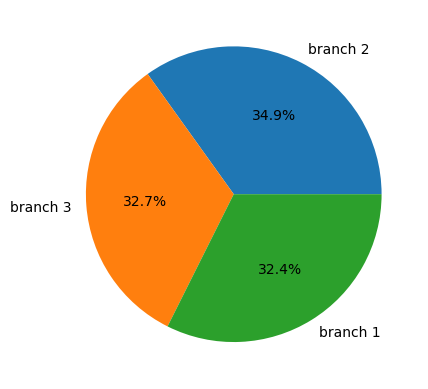

In [117]:
fig, ax = plt.subplots()
# ax.pie((cnt_1, cnt_2, cnt_3, cnt_0), labels=('branch 2', 'branch 3', 'branch 1', 'delta = 0'), autopct='%1.1f%%')
ax.pie((cnt_1, cnt_2, cnt_3), labels=('branch 2', 'branch 3', 'branch 1'), autopct='%1.1f%%')
plt.show()

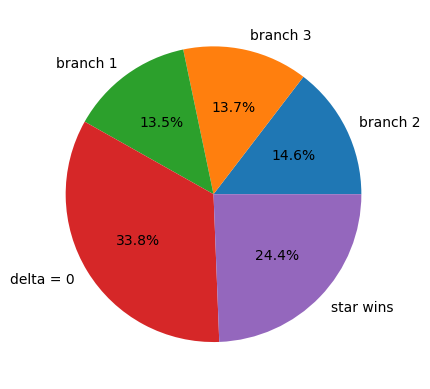

In [118]:
fig, ax = plt.subplots()
ax.pie((cnt_1, cnt_2, cnt_3, cnt_0, (cnt_4 - cnt_0)), labels=('branch 2', 'branch 3', 'branch 1', 'delta = 0', 'star wins'), autopct='%1.1f%%')
plt.show()

Plot histogram for branch that wins
---------------------

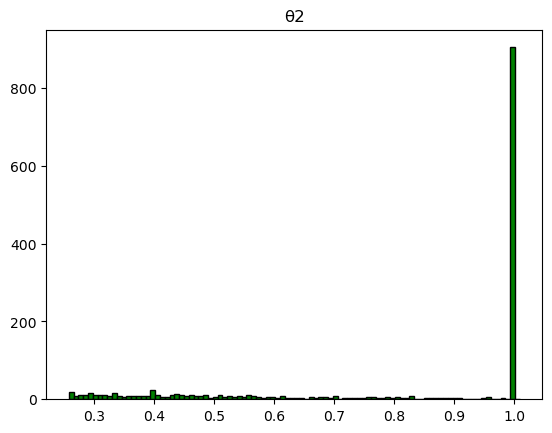

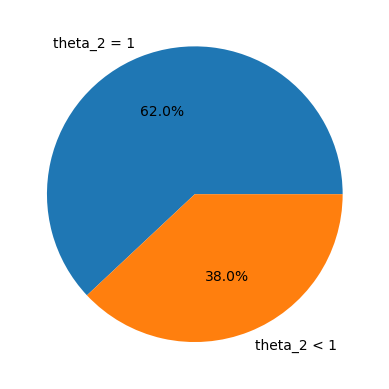

number of theta_2 = 1 is 905
number of theta_2 < 1 is 555


In [119]:
winner = max(cnt_1, cnt_2, cnt_3)

# branch 2 wins
if winner == cnt_1:
    binwidth = 0.008
    plt.hist(theta_2_unique, bins=np.arange(min(theta_2_unique), max(theta_2_unique) + 2 * binwidth, binwidth), 
             edgecolor="black", color="green")
    plt.title('θ2')
    plt.show()
    
    # When a branch wins, what fraction is 1 v. < 1?
    cnt_one = 0     # number of theta = 1
    cnt_lt_one = 0  # number of theta < 1
    for i in range(len(theta_2_unique)):
        if theta_2_unique[i] == 1.0:
            cnt_one += 1
        elif theta_2_unique[i] < 1:
            cnt_lt_one += 1
            
    fig, ax = plt.subplots()
    ax.pie((cnt_one, cnt_lt_one), labels=('theta_2 = 1', 'theta_2 < 1'), autopct='%1.1f%%')
    plt.show()
    print(f'number of theta_2 = 1 is {cnt_one}')
    print(f'number of theta_2 < 1 is {cnt_lt_one}')
    
# branch 3 wins
elif winner == cnt_2:
    binwidth = 0.008
    plt.hist(theta_3_unique, bins=np.arange(min(theta_3_unique), max(theta_3_unique) + 2 * binwidth, binwidth), 
             edgecolor="black", color="green")
    plt.title('θ3')
    plt.show()
    
    # When a branch wins, what fraction is 1 v. < 1?
    cnt_one = 0     # number of theta = 1
    cnt_lt_one = 0  # number of theta < 1
    for i in range(len(theta_3_unique)):
        if theta_3_unique[i] == 1.0:
            cnt_one += 1
        elif theta_3_unique[i] < 1:
            cnt_lt_one += 1
            
    fig, ax = plt.subplots()
    ax.pie((cnt_one, cnt_lt_one), labels=('theta_3 = 1', 'theta_3 < 1'), autopct='%1.1f%%')
    plt.show()
    print(f'number of theta_3 = 1 is {cnt_one}')
    print(f'number of theta_3 < 1 is {cnt_lt_one}')
    
# branch 1 wins
elif winner == cnt_3:
    binwidth = 0.008
    plt.hist(theta_1_unique, bins=np.arange(min(theta_1_unique), max(theta_1_unique) + 2 * binwidth, binwidth), 
             edgecolor="black", color="green")
    plt.title('θ1')
    plt.show()
    
    # When a branch wins, what fraction is 1 v. < 1?
    cnt_one = 0     # number of theta = 1
    cnt_lt_one = 0  # number of theta < 1
    for i in range(len(theta_1_unique)):
        if theta_1_unique[i] == 1.0:
            cnt_one += 1
        elif theta_1_unique[i] < 1:
            cnt_lt_one += 1
            
    fig, ax = plt.subplots()
    ax.pie((cnt_one, cnt_lt_one), labels=('theta_1 = 1', 'theta_1 < 1'), autopct='%1.1f%%')
    plt.show()
    print(f'number of theta_1 = 1 is {cnt_one}')
    print(f'number of theta_1 < 1 is {cnt_lt_one}')

### case 1 (branch 2 was chosen)

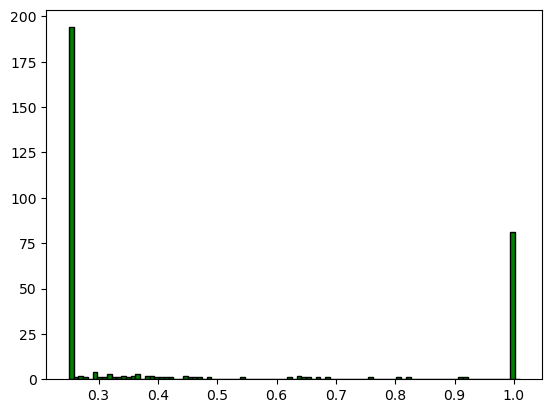

In [280]:
# histogram of all θ2 (including cases where δ = 0, θ2 is from the first pair of (θ2, δ=0) )

binwidth = 0.008
plt.hist(theta_2, bins=np.arange(min(theta_2), max(theta_2) + 2 * binwidth, binwidth), 
         edgecolor="black", color="green")
plt.show()

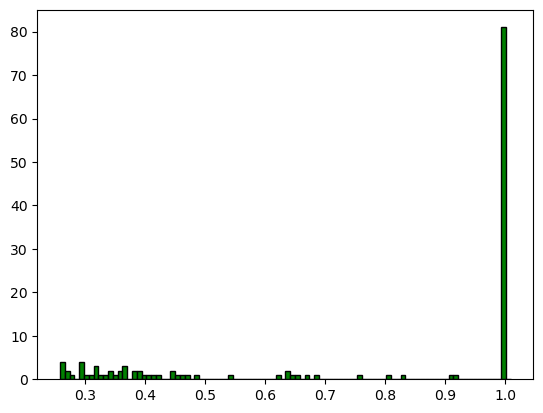

In [281]:
# histogram of θ2 (excluding cases where δ = 0)

binwidth = 0.008
plt.hist(theta_2_unique, bins=np.arange(min(theta_2_unique), max(theta_2_unique) + 2 * binwidth, binwidth), 
         edgecolor="black", color="green")
plt.show()

### case 2 (branch 3 was chosen)

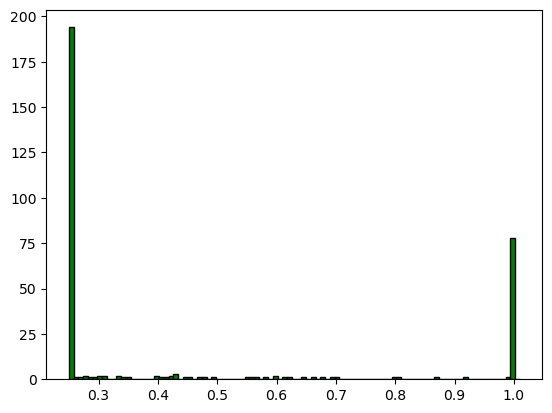

In [282]:
# histogram of all θ3 (including cases where δ = 0, θ3 is from the first pair of (θ3, δ=0) )

binwidth = 0.008
plt.hist(theta_3, bins=np.arange(min(theta_3), max(theta_3) + 2 * binwidth, binwidth), 
         edgecolor="black", color="green")
plt.show()

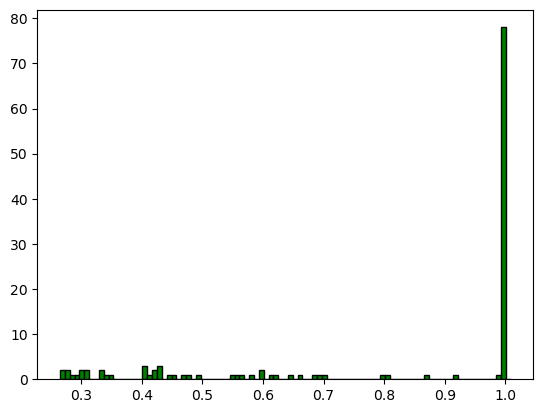

In [283]:
# histogram of θ3 (excluding cases where δ = 0)

binwidth = 0.008
plt.hist(theta_3_unique, bins=np.arange(min(theta_3_unique), max(theta_3_unique) + 2 * binwidth, binwidth), 
         edgecolor="black", color="green")
plt.show()

### case 3 (branch 1 was chosen)

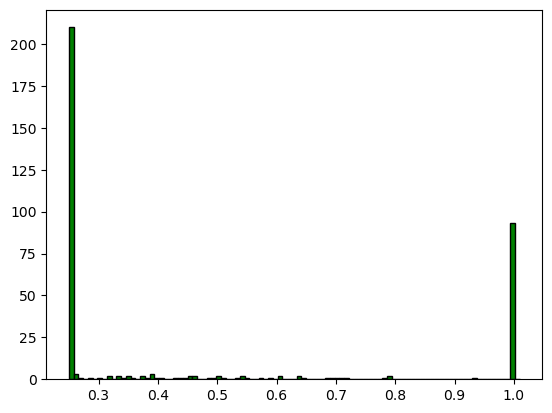

In [284]:
# histogram of all θ1 (including cases where δ = 0, θ1 is from the first pair of (θ1, δ=0) )

binwidth = 0.008
plt.hist(theta_1, bins=np.arange(min(theta_1), max(theta_1) + 2 * binwidth, binwidth), 
         edgecolor="black", color="green")
plt.show()

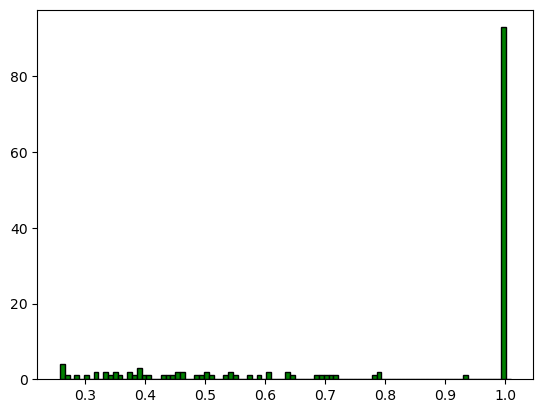

In [285]:
# histogram of θ1 (excluding cases where δ = 0)

binwidth = 0.008
plt.hist(theta_1_unique, bins=np.arange(min(theta_1_unique), max(theta_1_unique) + 2 * binwidth, binwidth), 
         edgecolor="black", color="green")
plt.show()

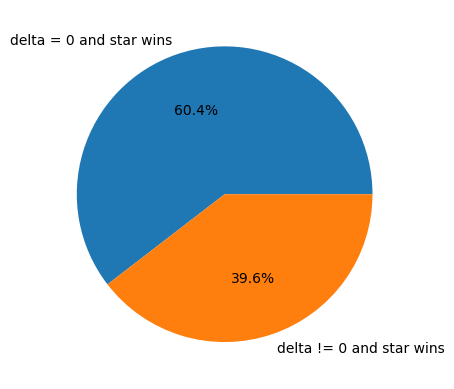

In [341]:
fig, ax = plt.subplots()
ax.pie((cnt_0, (cnt_4 - cnt_0)), labels=('delta = 0 and star wins', 'delta != 0 and star wins'), autopct='%1.1f%%')
plt.show()